In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [542]:
df_ratings = pd.read_csv('movies/rating.csv',nrows=100001)
df_movies = pd.read_csv('movies/movie.csv',nrows=100001)
df_genscore = pd.read_csv('movies/genome_scores.csv',nrows=100001)
df_gentags = pd.read_csv('movies/genome_tags.csv',nrows=100001)
df_link = pd.read_csv('movies/link.csv',nrows=100001)
df_tag = pd.read_csv('movies/tag.csv',nrows=100001)

In [355]:
#Afficher les premières lignes du DataFrame pour avoir un aperçu initial.
print(df_ratings.head())

   userId  movieId  rating            timestamp
0       1        2     3.5  2005-04-02 23:53:47
1       1       29     3.5  2005-04-02 23:31:16
2       1       32     3.5  2005-04-02 23:33:39
3       1       47     3.5  2005-04-02 23:32:07
4       1       50     3.5  2005-04-02 23:29:40


In [356]:
#Obtenir des informations sur le jeu de données, telles que le nombre de lignes, le nombre de colonnes et les types de données.

print(df_ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100001 entries, 0 to 100000
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100001 non-null  int64  
 1   movieId    100001 non-null  int64  
 2   rating     100001 non-null  float64
 3   timestamp  100001 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 3.1+ MB
None


- Obtenir des statistiques sommaires sur les colonnes numériques, comme la moyenne, l'écart-type, le minimum et le maximum.



In [357]:
print(df_ratings.describe())

              userId        movieId         rating
count  100001.000000  100001.000000  100001.000000
mean      362.833792    8572.393946       3.507600
std       196.804842   19056.004272       1.062924
min         1.000000       1.000000       0.500000
25%       198.000000     858.000000       3.000000
50%       370.000000    2109.000000       3.500000
75%       536.000000    4446.000000       4.000000
max       702.000000  128594.000000       5.000000


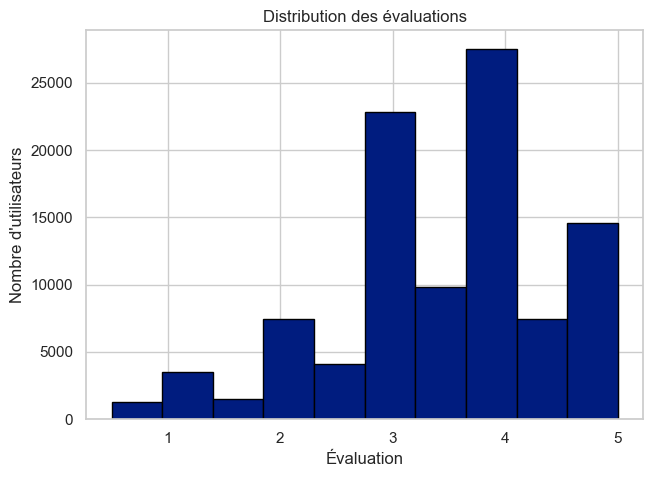

In [358]:
# histogramme pour visualiser la distribution des évaluations attribuées aux films.
plt.hist(df_ratings['rating'], bins=10, edgecolor='black')
plt.xlabel('Évaluation')
plt.ylabel('Nombre d\'utilisateurs')
plt.title('Distribution des évaluations')
plt.show()

- Identification des films les plus évalués en comptant le nombre d'avis par film.

In [359]:
top_movies = df_ratings['movieId'].value_counts().head(10)
print(top_movies)

296     350
356     340
318     305
480     302
593     295
260     264
110     262
589     256
2571    253
527     247
Name: movieId, dtype: int64


- Les utilisateurs qui ont contribué le plus grand nombre d'évaluations.

In [360]:
top_users = df_ratings['userId'].value_counts().head(10)
print(top_users)

156    2179
586    1431
572    1326
359    1300
208    1288
394    1212
298    1127
116    1110
632    1094
614    1042
Name: userId, dtype: int64


- Décomposition de timestamp

In [361]:
df_ratings['timestamp'] = pd.to_datetime(df_ratings['timestamp'], errors='coerce')
df_ratings['year'] = df_ratings['timestamp'].dt.year
df_ratings['month'] = df_ratings['timestamp'].dt.month
df_ratings['time'] = df_ratings['timestamp'].dt.time
df_ratings['date'] = df_ratings['timestamp'].dt.date

In [362]:
df_ratings.head()

,userId,movieId,rating,timestamp,year,month,time,date
0,1,2,3.5,2005-04-02 23:53:47,2005,4,23:53:47,2005-04-02
1,1,29,3.5,2005-04-02 23:31:16,2005,4,23:31:16,2005-04-02
2,1,32,3.5,2005-04-02 23:33:39,2005,4,23:33:39,2005-04-02
3,1,47,3.5,2005-04-02 23:32:07,2005,4,23:32:07,2005-04-02
4,1,50,3.5,2005-04-02 23:29:40,2005,4,23:29:40,2005-04-02


In [363]:
print('Année :          ', df_ratings.year.unique())
print('Mois :         ', df_ratings.month.unique())
print('Note unique : ', df_ratings.rating.unique())
print('Note moyenne : ', round(df_ratings.rating.mean(), 2))
print('Fréquence de chaque valeur dévaluation:\n',df_ratings['rating'].value_counts())

Année :           [2005 2004 2000 1999 1996 1997 2002 2001 2009 2011 2008 2010 2007 1998
 2003 2015 2006 2014 2013 2012]
Mois :          [ 4  9 11 12  8  3  1  6  7 10  5  2]
Note unique :  [3.5 4.  3.  4.5 5.  2.  1.  2.5 0.5 1.5]
Note moyenne :  3.51
Fréquence de chaque valeur dévaluation:
 4.0    27538
3.0    22818
5.0    14568
3.5     9812
2.0     7472
4.5     7421
2.5     4088
1.0     3530
1.5     1510
0.5     1244
Name: rating, dtype: int64


In [364]:
df_ratings = df_ratings.sort_values('movieId')

- Le nombre de notes par année

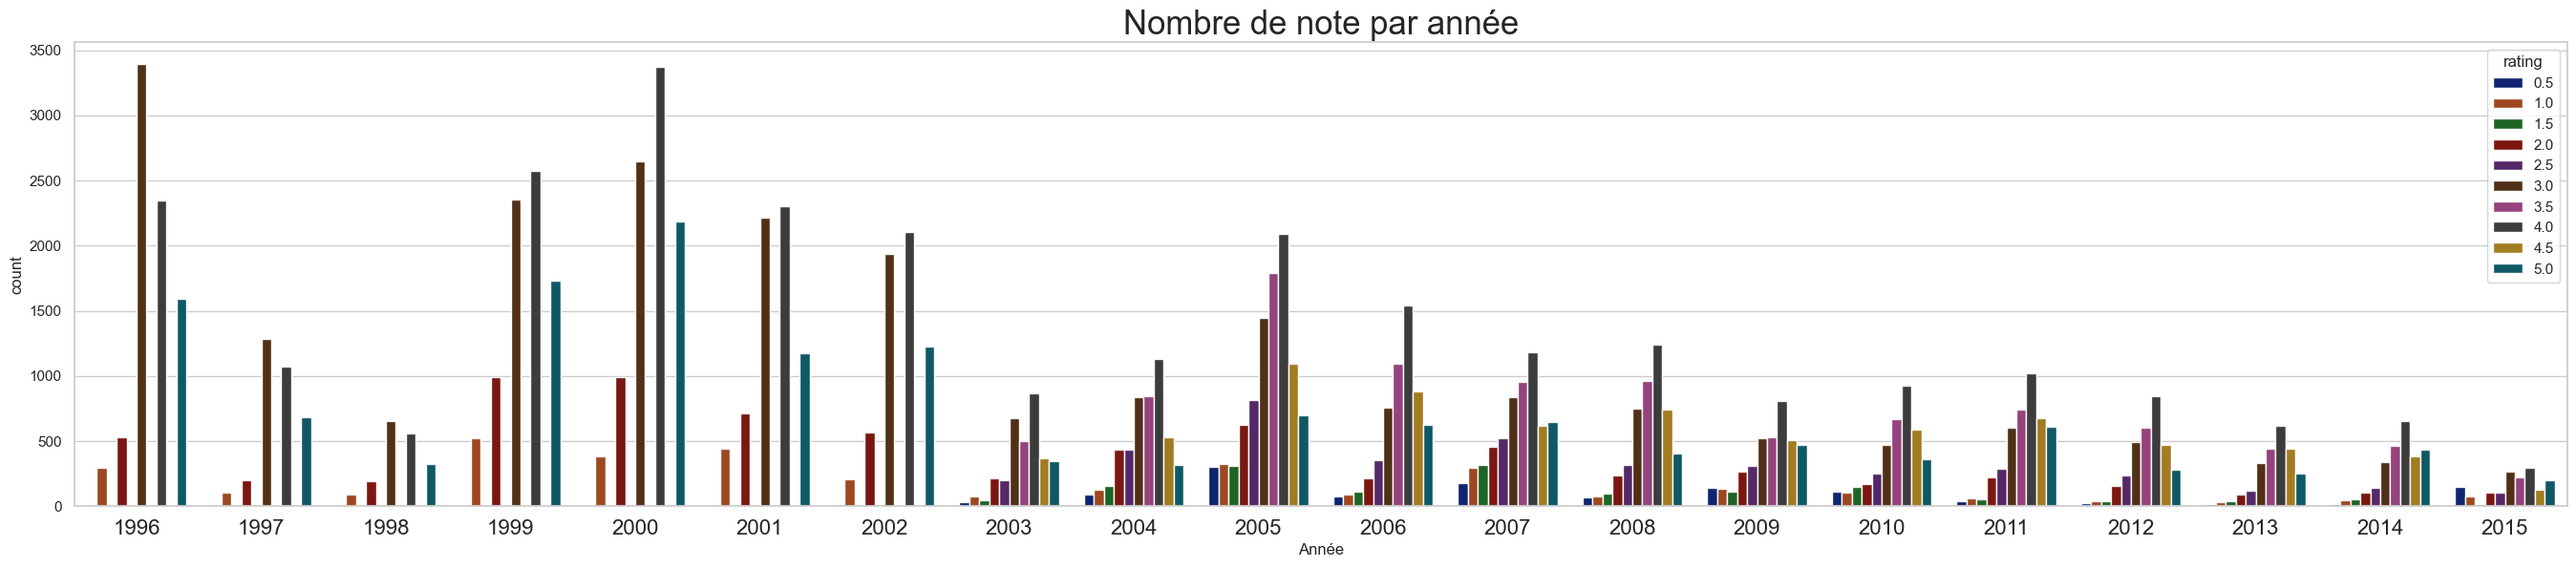

In [365]:
plt.figure(figsize= (30, 6))

sns.countplot(data = df_ratings, x=df_ratings.year,
              hue= df_ratings.rating)

plt.title('Nombre de note par année', size= 25)
plt.xlabel("Année")
plt.xticks(size= 16)

plt.show()

- Le nombre de notes par mois

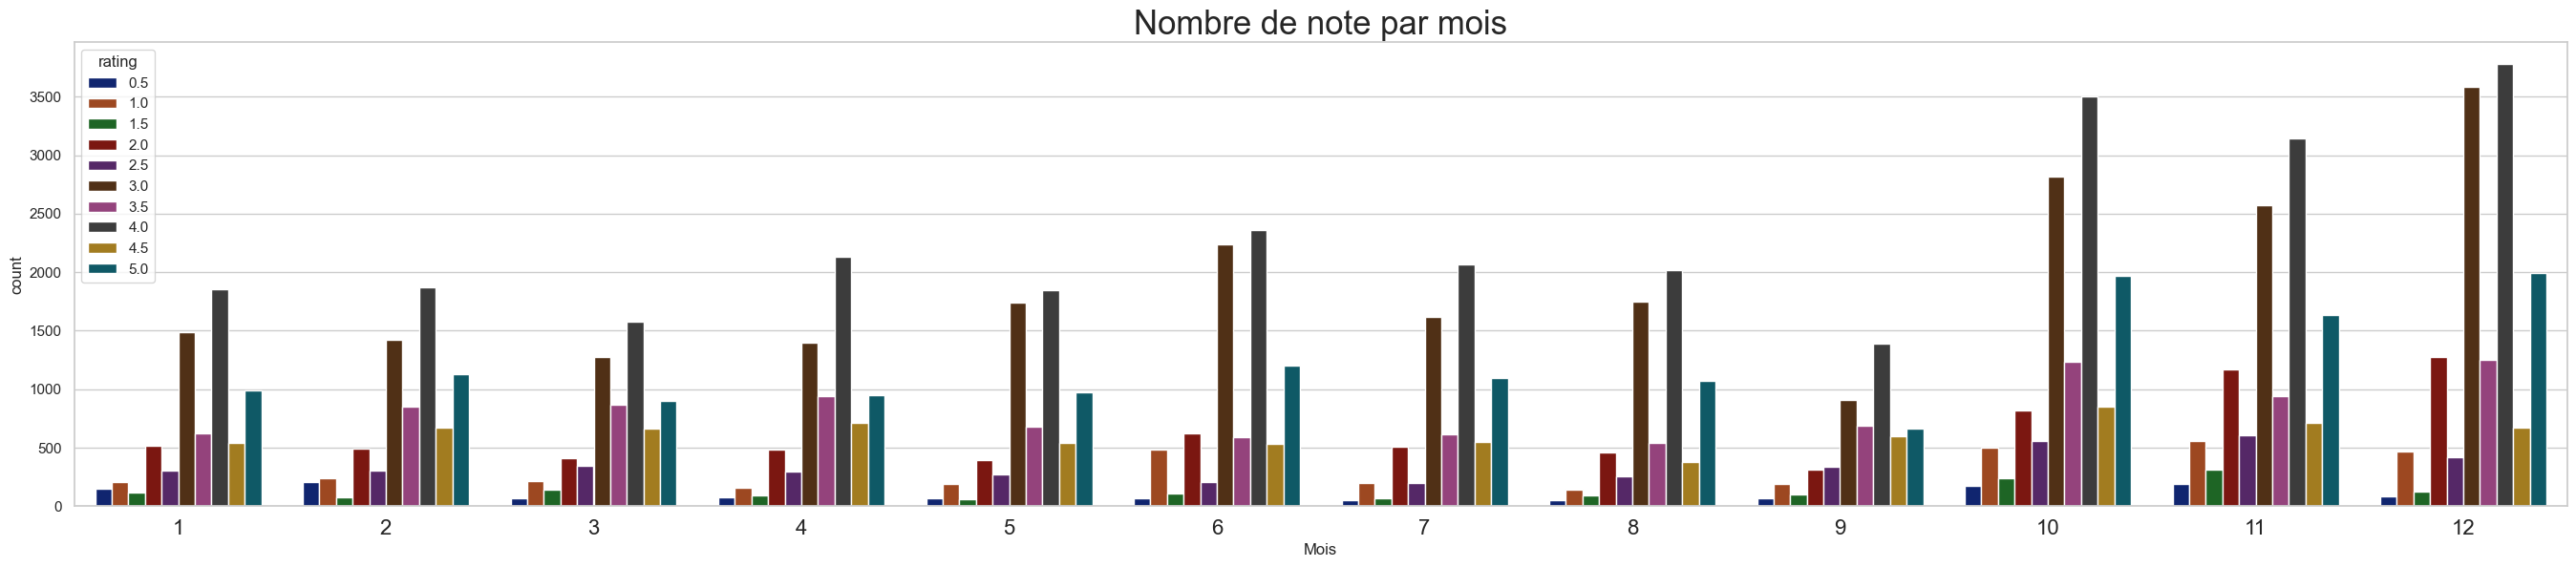

In [366]:
plt.figure(figsize= (30, 6))

sns.countplot(data = df_ratings, x=df_ratings.month,
              hue= df_ratings.rating)

plt.title('Nombre de note par mois', size= 25)
plt.xlabel("Mois")
plt.xticks(size= 16)
plt.show()

- les 10 meilleurs utilisateurs en fonction du nombre de notes. 

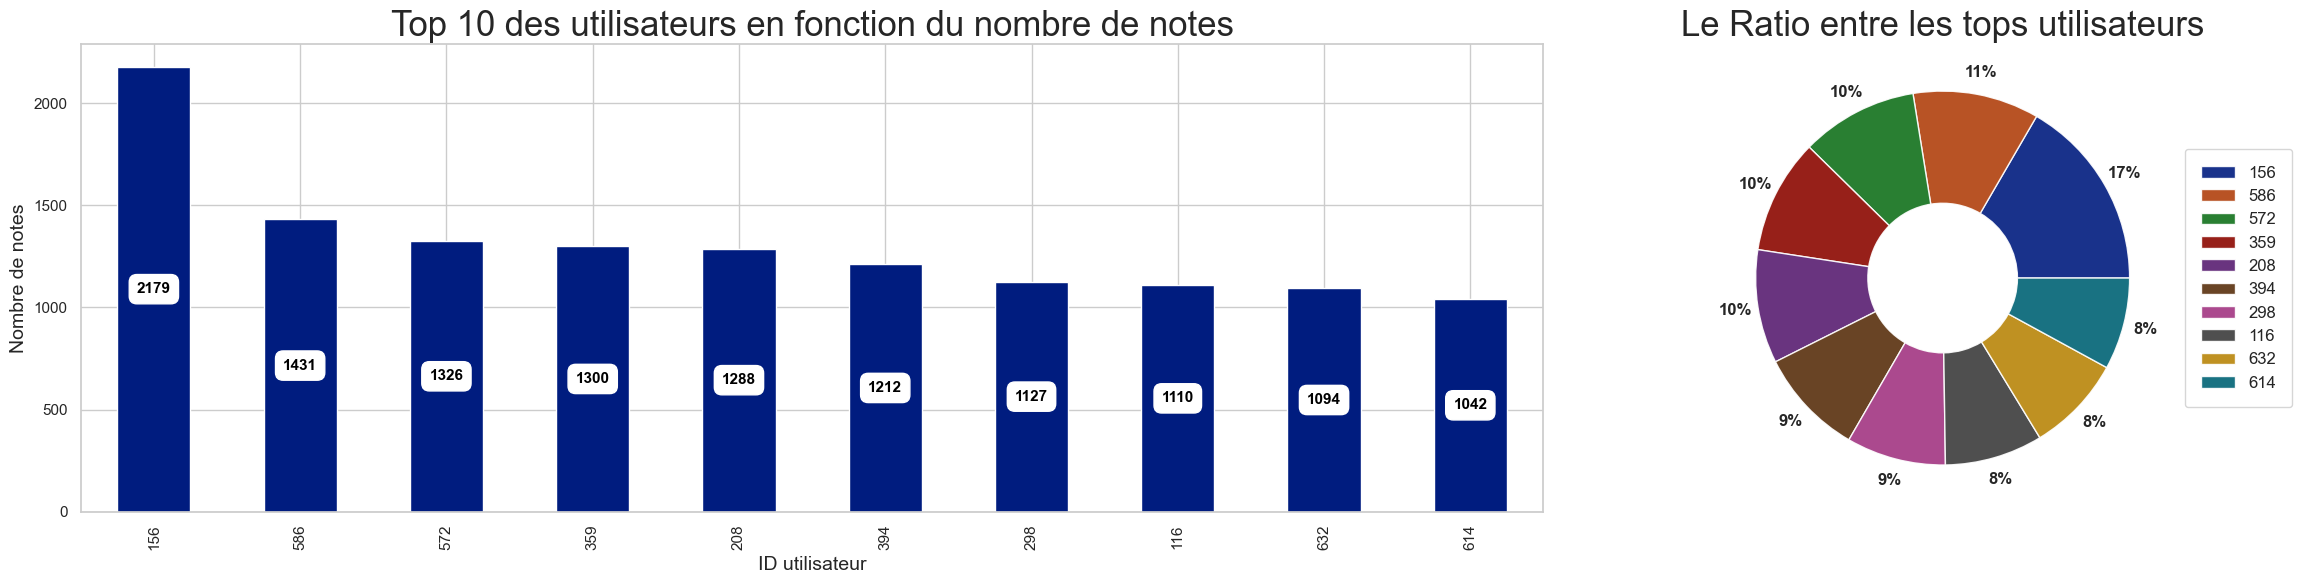

In [367]:
fig, axes = plt.subplots(1,2)

ax = df_ratings['userId'].value_counts()[:10].plot.bar(ax= axes[0], figsize=(30,6))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+ p.get_width()/2, p.get_height()/2),
                va="center", ha="center",
                size = 11, weight = 'bold', rotation = 0, color = 'black',
                bbox=dict(boxstyle="round,pad=0.5", fc='white'))

ax.set_xlabel('ID utilisateur', fontsize=14)
ax.set_ylabel('Nombre de notes', fontsize=14)
axes[0].set_title('Top 10 des utilisateurs en fonction du nombre de notes', size= 25);

df = df_ratings['userId'].value_counts()[:10].reset_index().rename(columns={'userId': 'count', 'index': 'userId'})
pie = plt.pie(
    df['count'], 
    wedgeprops=dict(width=0.6, alpha=0.9),
    autopct='%1.0f%%',
    pctdistance=1.12, 
    textprops={
        'fontsize': 12, 
        'fontweight': 'bold'});

axes[1].legend(df['userId'], loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), borderpad=1, fontsize=12)
axes[1].set_title('Le Ratio entre les tops utilisateurs', size= 25);

plt.tight_layout(rect=[0,0,0.9,1])
plt.show()

- Nombre d'utilisateurs uniques par an

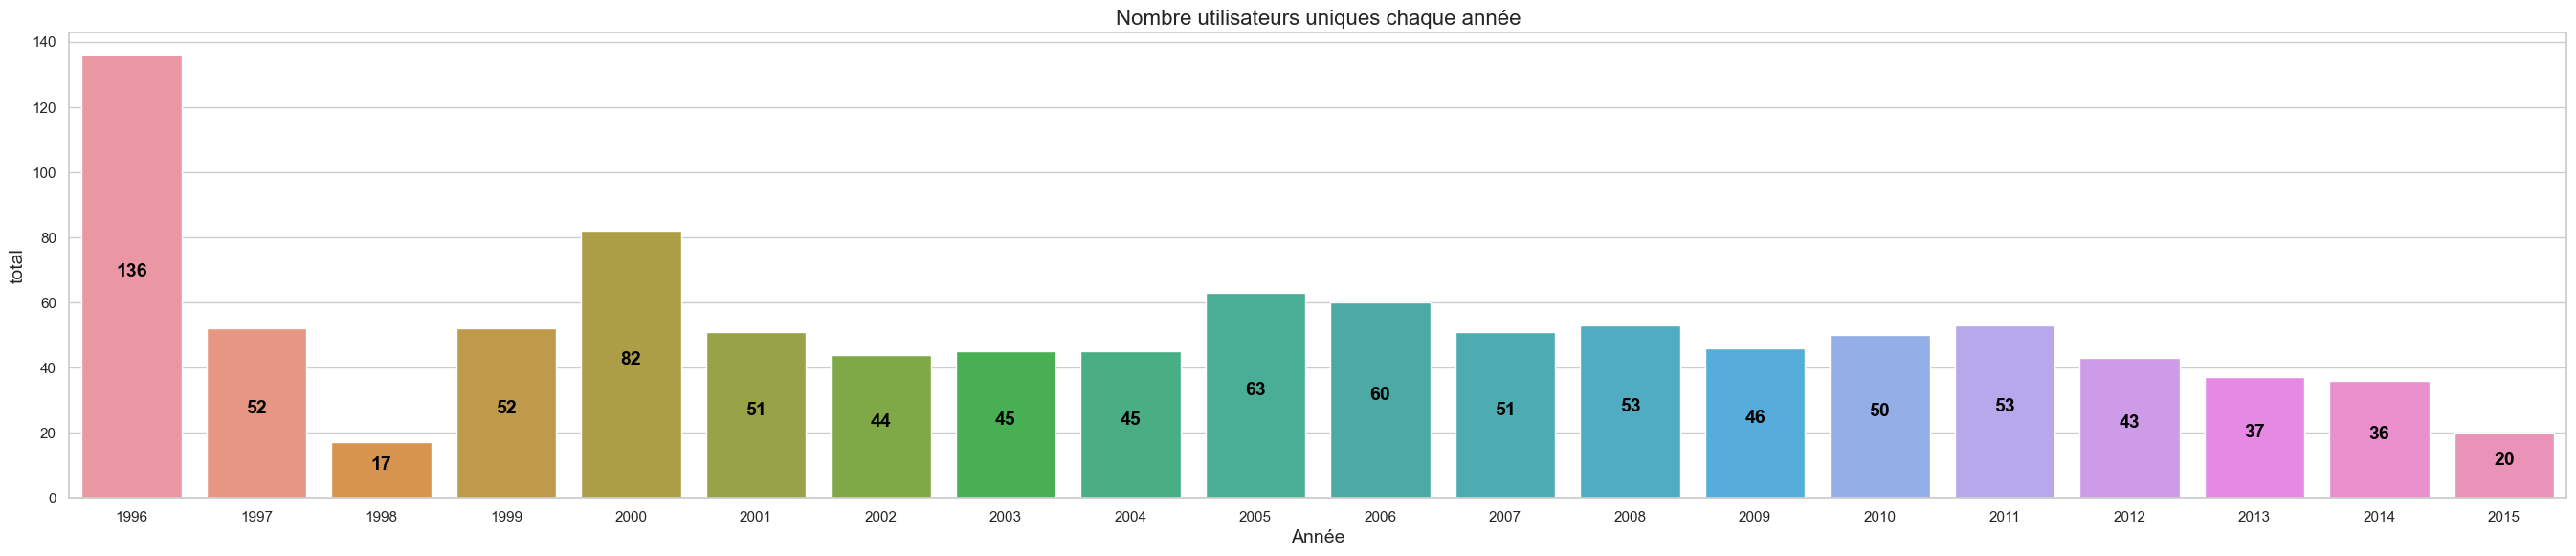

In [368]:
df_temp = df_ratings[['year', 'userId']].groupby(['year']).nunique().reset_index()

plt.figure(figsize= (30, 6))
ax = sns.barplot(x = 'year', y = 'userId', data = df_temp);

for i in ax.patches:    
    ax.text(x = i.get_x() + i.get_width()/2, y = i.get_height()/2,
            s = int(i.get_height()), 
            ha = 'center', size = 14, weight = 'bold', rotation = 0, color = 'black')
ax.set_xlabel('Année', fontsize=14)
ax.set_ylabel('total', fontsize=14)
plt.title('Nombre utilisateurs uniques chaque année' , fontsize=16);
plt.show()


- Movies

In [369]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [370]:
print(f"Shape : {df_movies.shape} \nSize  :  {df_movies.size}")

Shape : (27278, 3) 
Size  :  81834


In [371]:
df_movies.nunique()

movieId    27278
title      27262
genres      1342
dtype: int64

In [372]:
def preprocess_movie_csv(movie_df):
    ''' 
   Extraire des années en trouvant 4 nombres consécutifs. (d+ ne fonctionne pas correctement si le titre contient des chiffres) 
   Trouver tous les genres uniques
   '''
    df = movie_df.copy()
    df['release_year'] = df.title.str.extract("\((\d{4})\)", expand=True).astype(str)
    df['title'] = df.title.str[:-7]
    df = df.join(df['genres'].str.get_dummies().astype(bool))
    df.drop('genres', inplace=True, axis=1)
    return df

In [373]:
processed_movie_df = preprocess_movie_csv(df_movies)
processed_movie_df.rename(columns={"(no genres listed)": "No Genre"}, inplace=True)
processed_movie_df

,movieId,title,release_year,No Genre,Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,1995,False,False,True,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
1,2,Jumanji,1995,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,Grumpier Old Men,1995,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
3,4,Waiting to Exhale,1995,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
4,5,Father of the Bride Part II,1995,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27273,131254,Kein Bund für's Leben,2007,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
27274,131256,"Feuer, Eis & Dosenbier",2002,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
27275,131258,The Pirates,2014,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
27276,131260,Rentun Ruusu,2001,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


- Les titres des films

In [374]:
df_movie_titles = processed_movie_df[['movieId','title']]
df_movie_titles

,movieId,title
0,1,Toy Story
1,2,Jumanji
2,3,Grumpier Old Men
3,4,Waiting to Exhale
4,5,Father of the Bride Part II
...,...,...
27273,131254,Kein Bund für's Leben
27274,131256,"Feuer, Eis & Dosenbier"
27275,131258,The Pirates
27276,131260,Rentun Ruusu


- Le nombre de films sortis par année

In [375]:
years = processed_movie_df.release_year.unique()
years.sort()
print(years)

['1891' '1893' '1894' '1895' '1896' '1898' '1899' '1900' '1901' '1902'
 '1903' '1905' '1909' '1910' '1912' '1913' '1914' '1915' '1916' '1917'
 '1918' '1919' '1920' '1921' '1922' '1923' '1924' '1925' '1926' '1927'
 '1928' '1929' '1930' '1931' '1932' '1933' '1934' '1935' '1936' '1937'
 '1938' '1939' '1940' '1941' '1942' '1943' '1944' '1945' '1946' '1947'
 '1948' '1949' '1950' '1951' '1952' '1953' '1954' '1955' '1956' '1957'
 '1958' '1959' '1960' '1961' '1962' '1963' '1964' '1965' '1966' '1967'
 '1968' '1969' '1970' '1971' '1972' '1973' '1974' '1975' '1976' '1977'
 '1978' '1979' '1980' '1981' '1982' '1983' '1984' '1985' '1986' '1987'
 '1988' '1989' '1990' '1991' '1992' '1993' '1994' '1995' '1996' '1997'
 '1998' '1999' '2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007'
 '2008' '2009' '2010' '2011' '2012' '2013' '2014' '2015' 'nan']


<Axes: title={'center': 'Nombre de films diffusés par an'}, xlabel='release_year'>

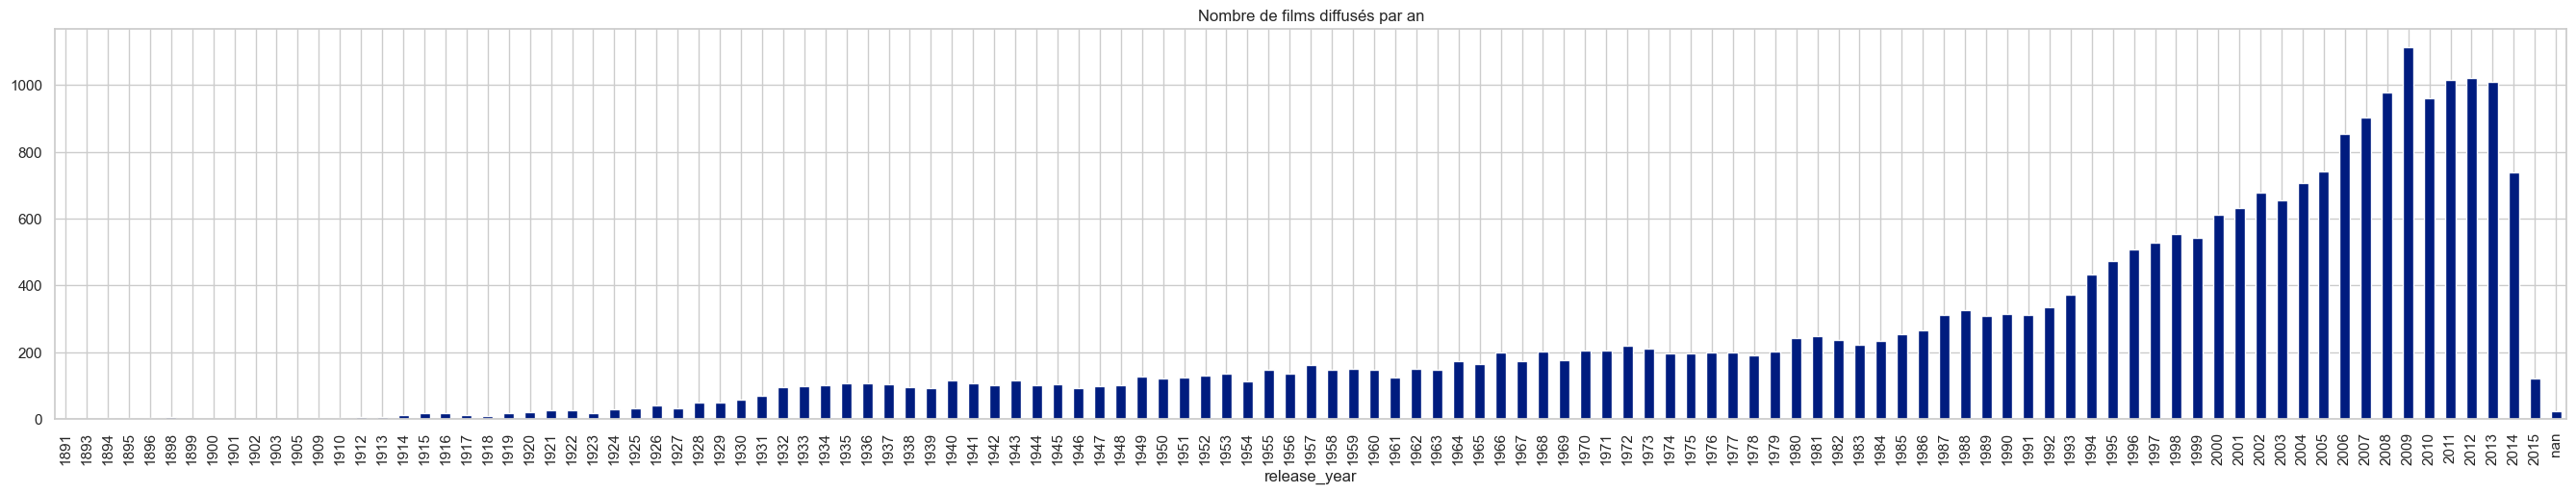

In [376]:
df_temp = processed_movie_df.groupby(['release_year'])['title'].count()
df_temp.plot.bar(x='year', y='movies', title='Nombre de films diffusés par an', figsize=(30, 5))

- Le nombre de films sortis au cours des 10 dernières années

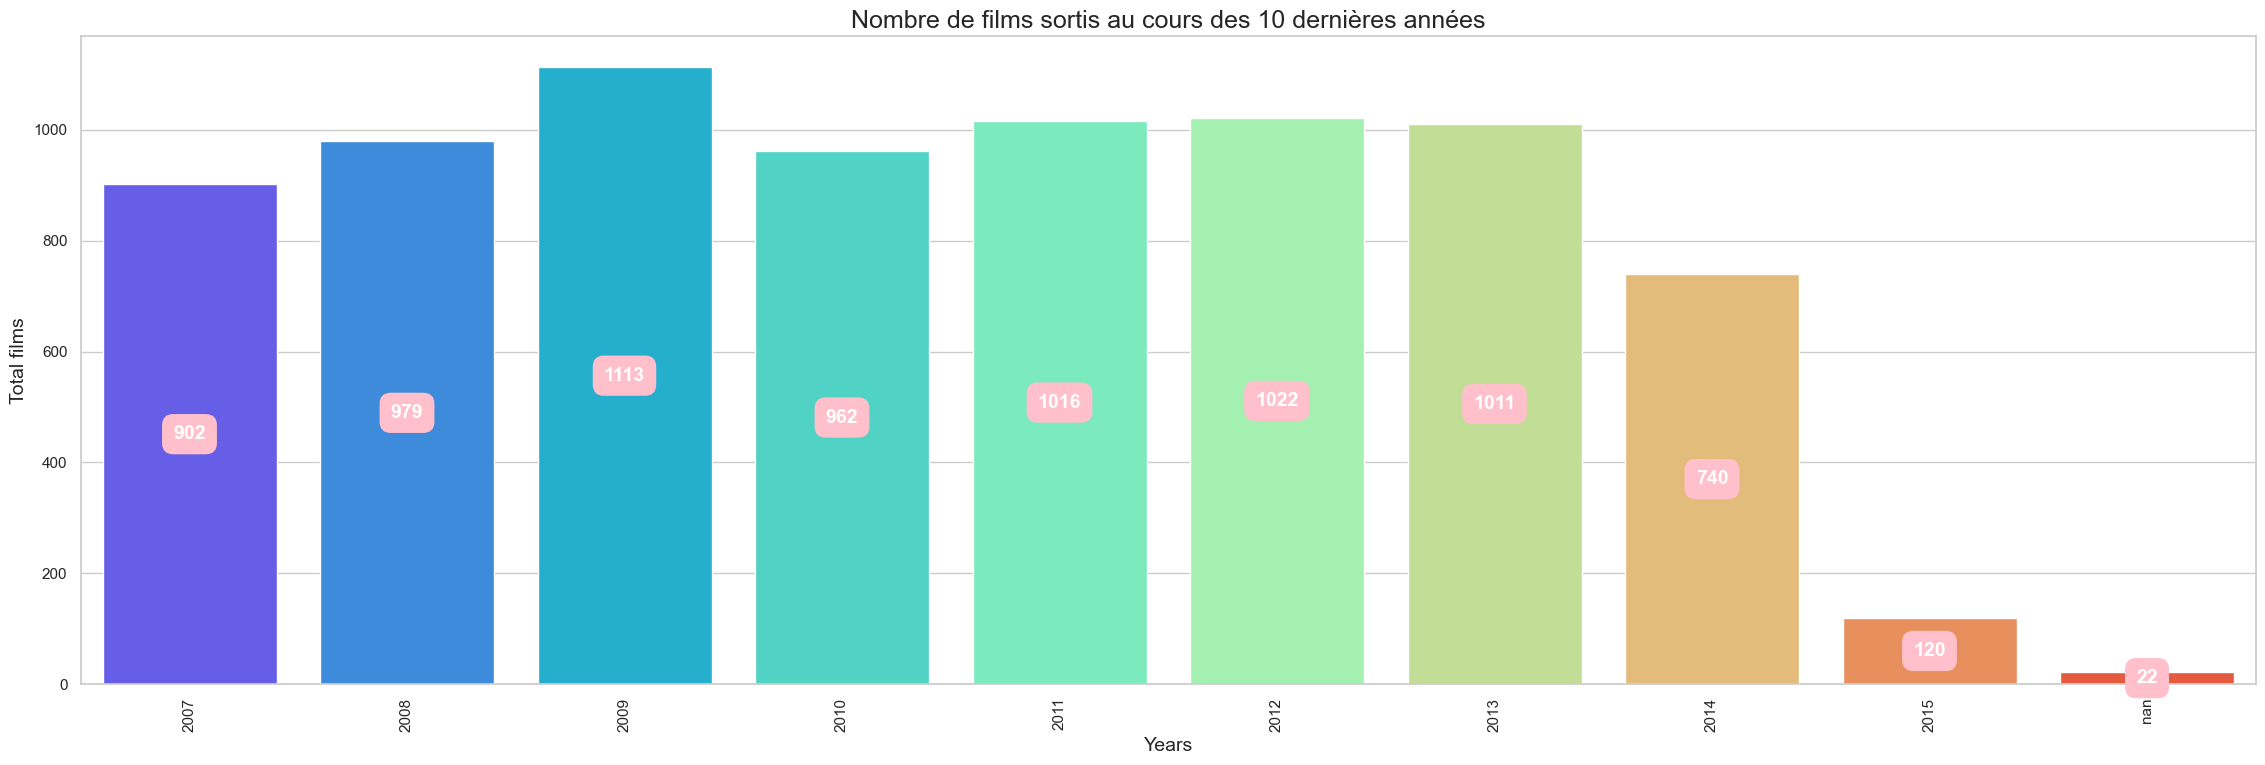

In [377]:
df_temp = processed_movie_df.groupby(['release_year'])['title'].count().tail(10)
plt.figure(figsize=(25,8))
ax= sns.barplot(x=df_temp.index,y=df_temp.values, data=processed_movie_df,palette='rainbow')

for i in ax.patches:    
    ax.text(x = i.get_x() + i.get_width()/2, y = i.get_height()/2,
            s = int(i.get_height()), 
            ha = 'center', va='center', size = 14, weight = 'bold', rotation = 0, color = 'white',
            bbox=dict(boxstyle="round,pad=0.5", fc='pink', ec="pink", lw=2))

plt.xlabel('Years',fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('Total films',fontsize=14)
plt.title("Nombre de films sortis au cours des 10 dernières années", fontsize=18)
plt.show()


- Le nombre de films sortis dans différents genres au cours des 10 dernières années.

In [378]:
genres_unique = pd.DataFrame(pd.DataFrame(df_movies.genres.str.split('|').tolist()).stack().unique(), columns=['genre'])
genres_unique[-1:]= "No Genre"
genres_unique

,genre
0,Adventure
1,Animation
2,Children
3,Comedy
4,Fantasy
5,Romance
6,Drama
7,Action
8,Crime
9,Thriller


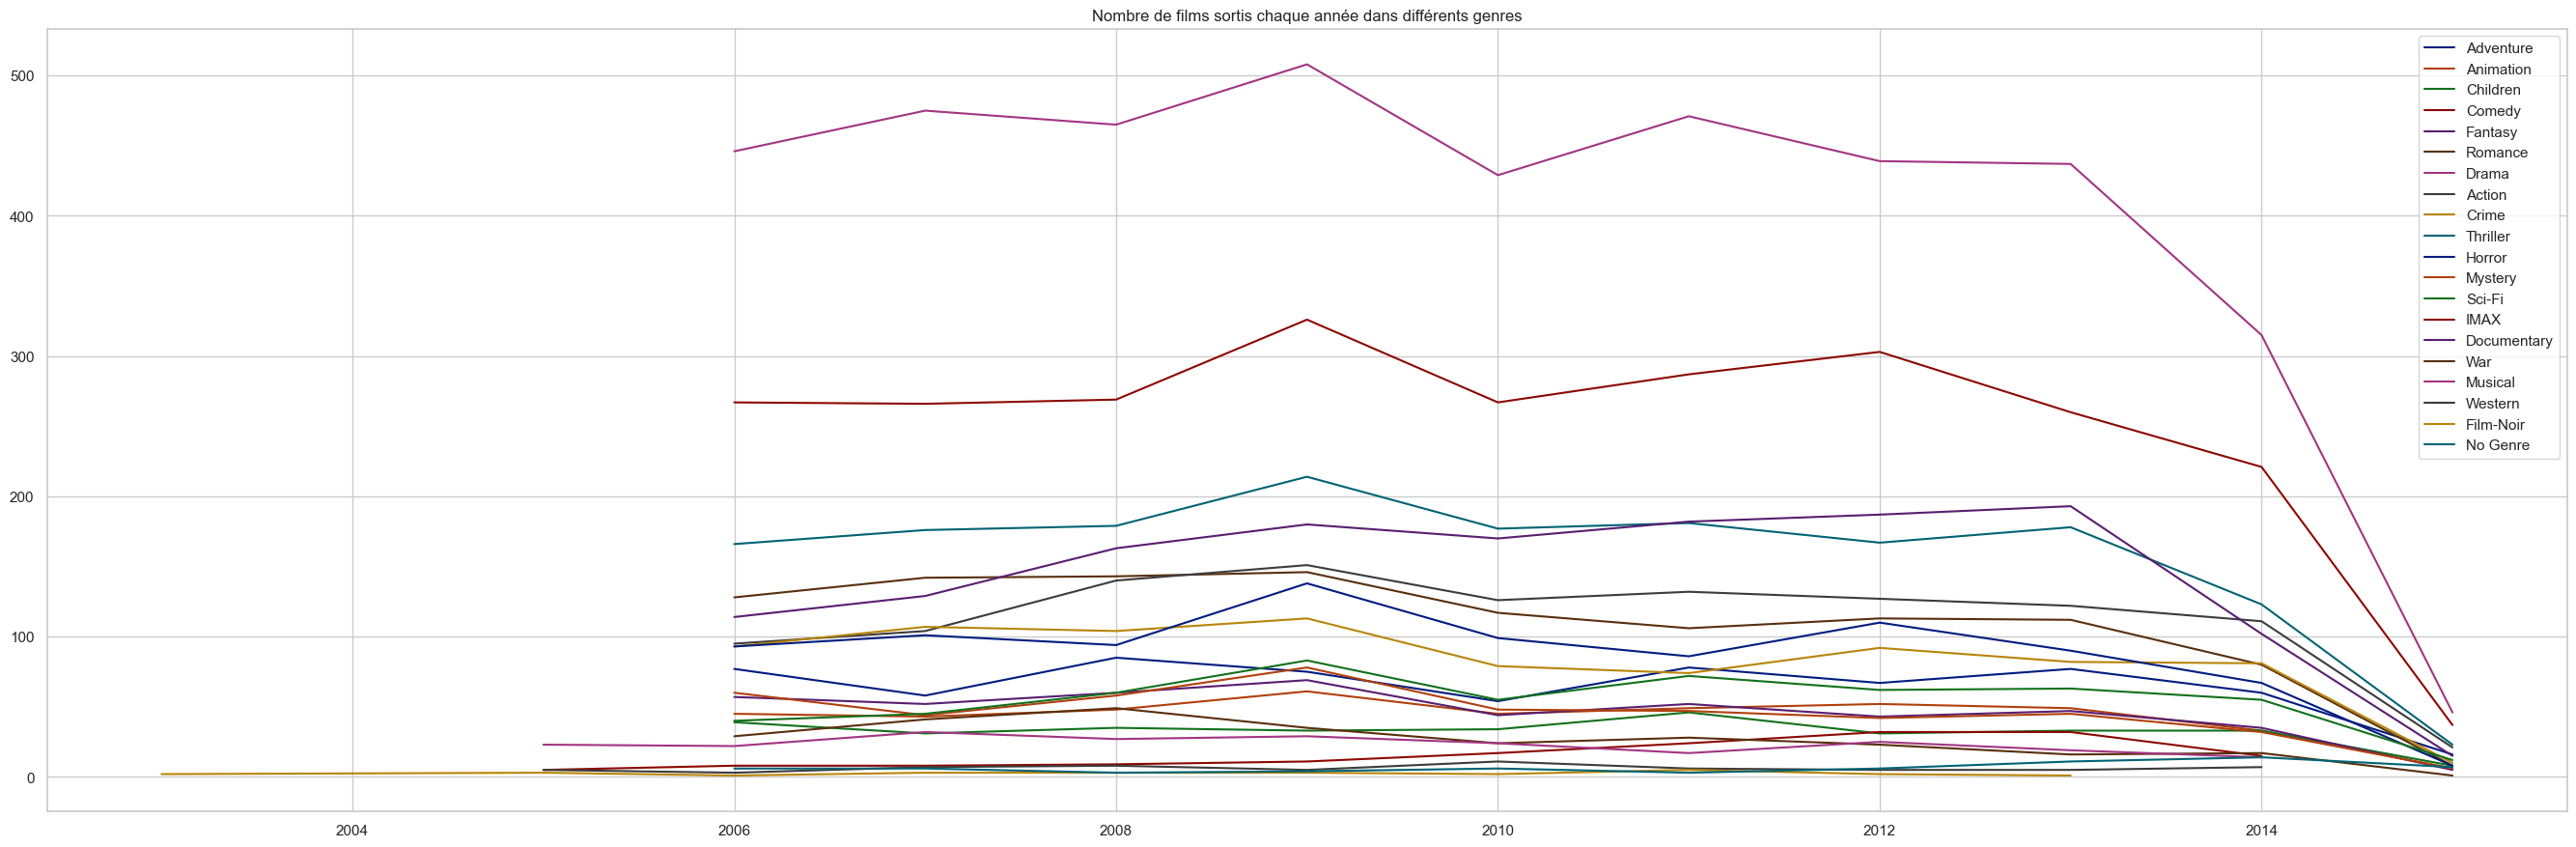

In [379]:
plt.figure(figsize=(30,10)) 
for genre in genres_unique.genre:
    df_temp = processed_movie_df[processed_movie_df[genre]==True][['release_year', 'movieId']]

    #remplir les nan avec la moyenne des années
    df_temp['release_year'] = pd.to_numeric(df_temp['release_year'], errors='coerce')
    df_temp['release_year'].fillna(int(df_temp['release_year'].mean()), inplace=True)
    df_temp['release_year'] =df_temp['release_year'].astype(int)  
    df_temp = df_temp.groupby(['release_year']).count().reset_index().tail(10)
    plt.plot(df_temp['release_year'], df_temp['movieId'], label=genre)
plt.title('Nombre de films sortis chaque année dans différents genres')
plt.legend()
plt.show()


- Les différents genres de films 

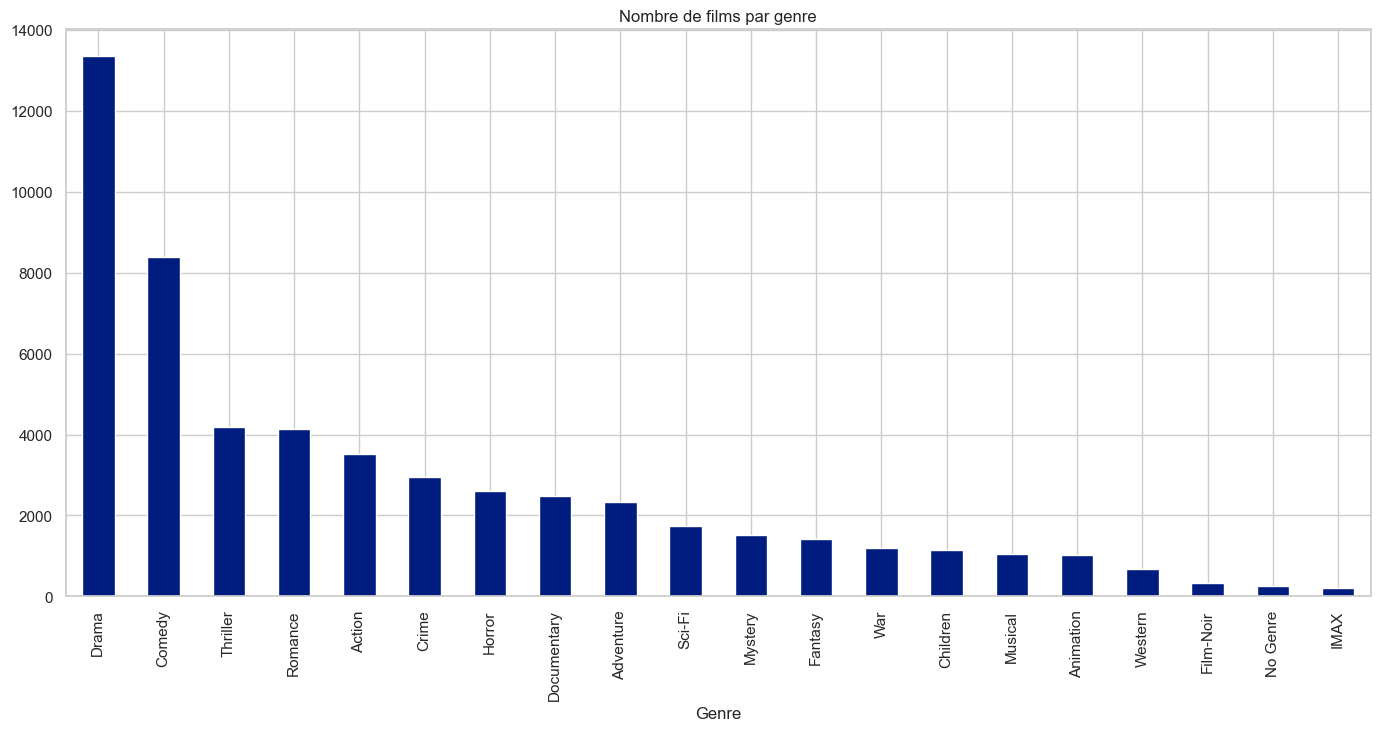

In [380]:
df_genres = pd.DataFrame(columns=['genre', 'num_movies'])

for genre in genres_unique.genre:
    row = [genre, processed_movie_df[processed_movie_df[genre]==True][['movieId']].count()]
    df_genres.loc[len(df_genres)] = row
    
df_genres['num_movies'] = df_genres['num_movies'].astype(np.int32)
df_genres = df_genres.sort_values('num_movies', ascending=False).set_index('genre')
plot_fig = df_genres['num_movies'].plot(kind='bar', figsize=(15,7))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plot_fig.set_title('Nombre de films par genre')
plot_fig.set_xlabel('Genre');

- Le pourcentage par genres

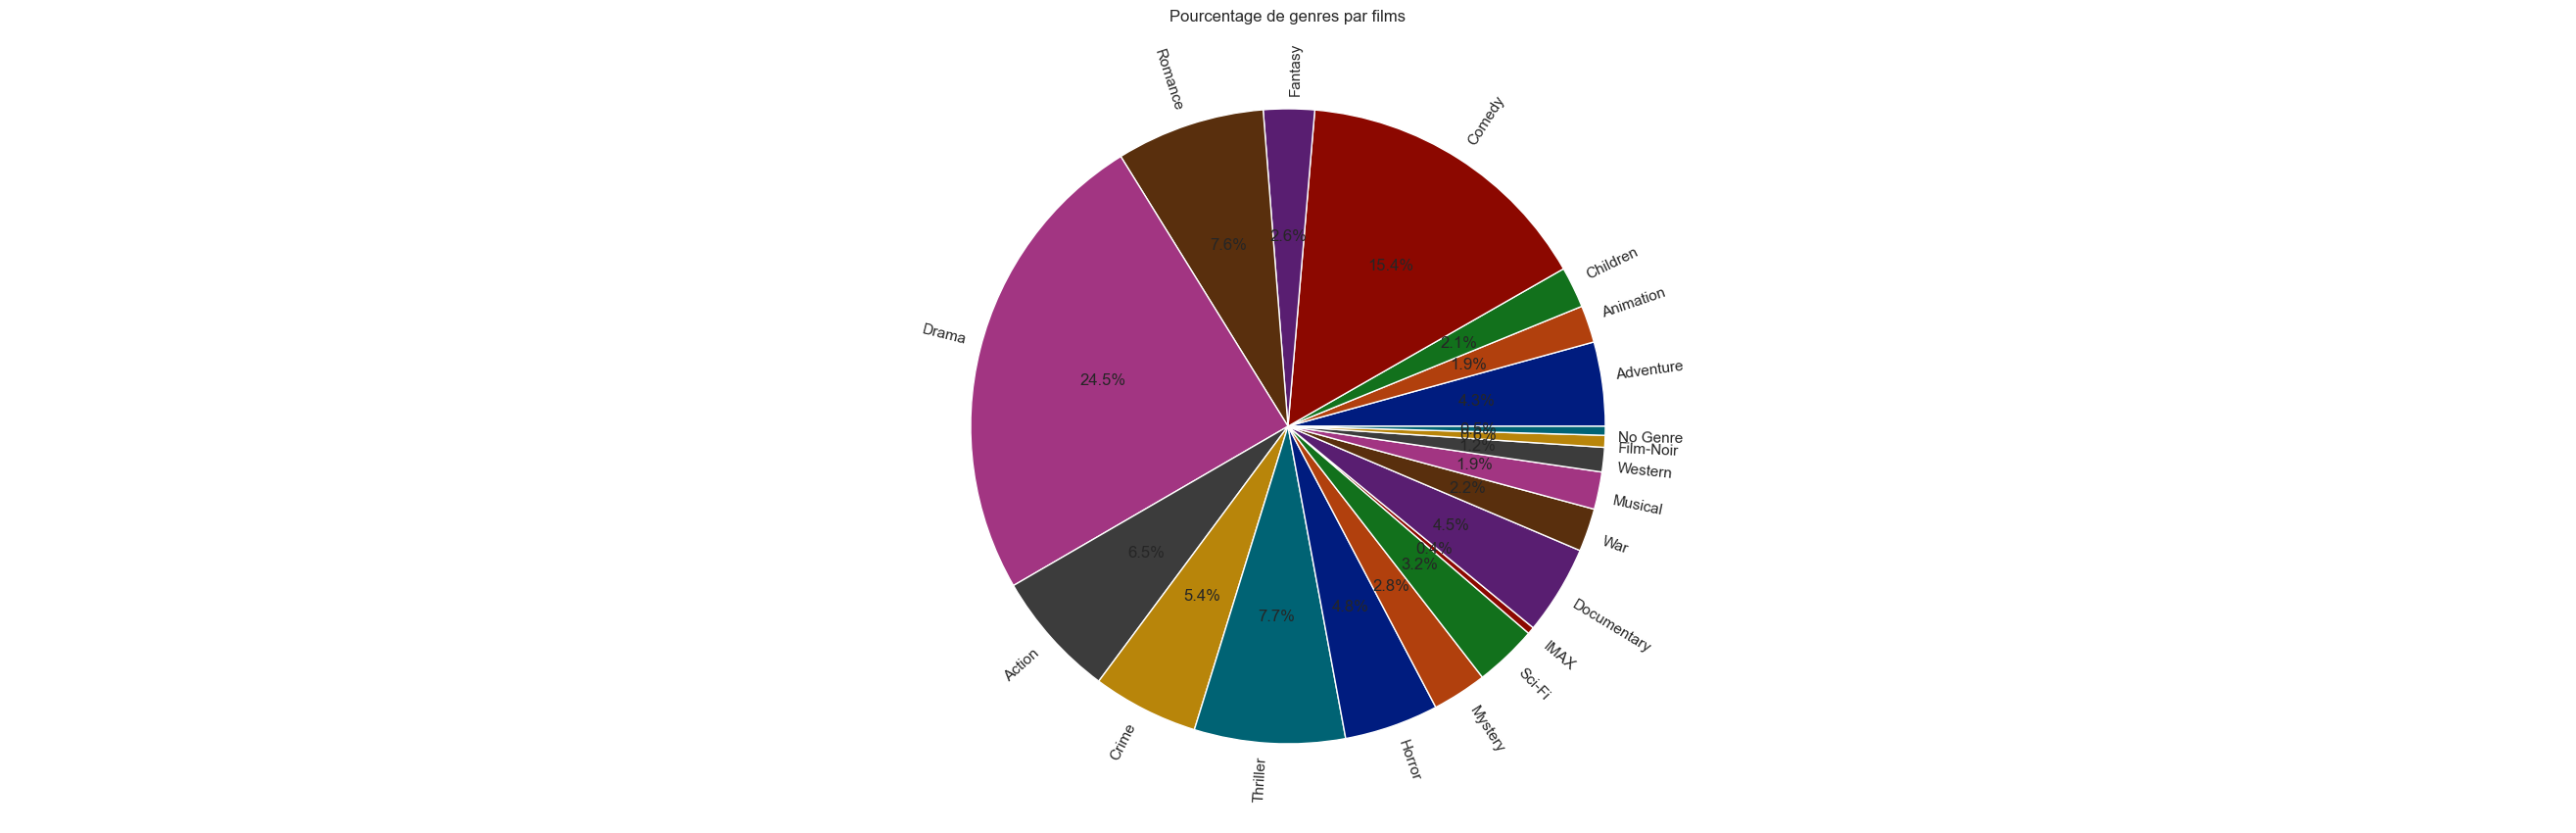

In [381]:
df_genres = pd.DataFrame(columns=['genre', 'num_movies'])

for genre in genres_unique.genre:
    row = [genre, processed_movie_df[processed_movie_df[genre]==True][['movieId']].count()]
    df_genres.loc[len(df_genres)] = row
plt.figure(figsize=(30,10)) 
plt.axis('equal');
plt.pie(df_genres['num_movies'], labels=df_genres['genre'], autopct='%.1f%%', labeldistance=1.04, rotatelabels=True)
plt.title("Pourcentage de genres par films")
plt.show()

## 1 - Collaborative Filtering (CF)
Le filtrage collaboratif est le processus de filtrage d'informations ou de modèles à l'aide de techniques impliquant la collaboration entre plusieurs utilisateurs, points de vue et sources de données.

Il existe deux approches de la CF -->

1) **CF basée sur la mémoire** - Il s'agit d'une approche qui trouve des similitudes entre les utilisateurs ou entre les articles afin de recommander des articles similaires. Les exemples incluent la FC basée sur le voisinage et les recommandations top-N basées sur l'article ou l'utilisateur.

2) **CF basée sur un modèle** - Dans cette approche, nous utilisons différents algorithmes d'exploration de données et d'apprentissage automatique pour prédire l'évaluation par les utilisateurs d'articles non évalués. Les exemples incluent la décomposition en valeurs singulières (SVD), l'analyse en composantes principales (PCA), etc.

Nous créons d’abord la colonne Nouvelle Année dans le dataframe du film

In [557]:
df_ratings = pd.read_csv('movies/rating.csv',nrows=100001)
df_movies = pd.read_csv('movies/movie.csv', nrows=100001)

In [558]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [559]:
df_movies['year'] = df_movies.title.str.extract('(\(\d\d\d\d\))',expand=False)
#Removing the parentheses
df_movies['year'] = df_movies.year.str.extract('(\d\d\d\d)',expand=False)

In [560]:
#Suppression des années de la colonne "titre".
df_movies['title'] = df_movies.title.str.replace('(\(\d\d\d\d\))', '')
#L'application de la fonction "strip" permet de se débarrasser de tout caractère d'espace
df_movies['title'] = df_movies['title'].apply(lambda x: x.strip())

C:\Users\worou\AppData\Local\Temp\ipykernel_20136\2194399100.py:2: FutureWarning:

The default value of regex will change from True to False in a future version.



In [561]:
df_movies.head()

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


In [569]:
df_movies.to_csv("df_movies.csv")

Le filtrage collaboratif ne fait pas de recommandations basées sur les caractéristiques du film. La recommandation est basée sur les appréciations ou les évaluations des voisins ou d'autres utilisateurs. Nous allons donc supprimer la colonne du genre, puisqu'elle n'est pas utile.

In [548]:
df_movies.drop(columns=['genres'], inplace=True)

In [549]:
df_movies.head()

,movieId,title,year
0,1,Toy Story,1995
1,2,Jumanji,1995
2,3,Grumpier Old Men,1995
3,4,Waiting to Exhale,1995
4,5,Father of the Bride Part II,1995


En ce qui concerne le cadre de données des évaluations, nous avons la colonne movieId qui est commune avec le cadre de données des films. Chaque utilisateur a donné plusieurs évaluations pour différents films. La colonne Timestamp n'est pas nécessaire pour le système de recommandation. Nous pouvons donc la supprimer.

In [562]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [563]:
df_ratings.drop(columns=['timestamp'], inplace = True)

In [564]:
df_ratings.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [571]:
df_ratings.to_csv("df_ratings.csv")

In [572]:
df_merge = df_movies.merge(df_ratings, left_on='movieId', right_on='movieId', how='inner')

In [573]:
df_merge.to_csv("df_merge.csv")

In [574]:
df_merge

,movieId,title,genres,year,userId,rating
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,3,4.0
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,6,5.0
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,8,4.0
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,10,4.0
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,11,4.5
...,...,...,...,...,...,...
99996,119141,The Interview,Action|Comedy,2014,631,3.0
99997,125916,Fifty Shades of Grey,Drama,2015,31,0.5
99998,125916,Fifty Shades of Grey,Drama,2015,692,0.5
99999,128488,Wild Card,Crime|Drama|Thriller,2015,284,3.0


## 1.1 ) User based Collaborative Filtering¶


Cette technique s'appelle le filtrage collaboratif, également connu sous le nom de filtrage utilisateur-utilisateur. Comme son nom l'indique, cette technique fait appel à d'autres utilisateurs pour recommander des articles à l'utilisateur. Elle tente de trouver des utilisateurs qui ont des préférences et des opinions similaires à celles de l'utilisateur, puis recommande à ce dernier des articles qu'ils ont aimés. Il existe plusieurs méthodes pour trouver des utilisateurs similaires (certaines font même appel à l'apprentissage automatique), et celle que nous utiliserons ici sera basée sur la fonction de corrélation de Pearson.

Le processus de création d'un système de recommandation basé sur l'utilisateur est le suivant :

- Sélectionner un utilisateur et les films qu'il a regardés.
- Sur la base de son évaluation des films, trouver les X meilleurs voisins.
- Obtenir la liste des films regardés par l'utilisateur pour chaque voisin.
- Calculer un score de similarité à l'aide d'une formule
- Recommander les éléments ayant le score le plus élevé

In [392]:
user = [
            {'title':'Breakfast Club, The', 'rating':4},
            {'title':'Toy Story', 'rating':2.5},
            {'title':'Jumanji', 'rating':3},
            {'title':"Pulp Fiction", 'rating':4.5},
            {'title':'Akira', 'rating':5}
         ] 
inputMovie = pd.DataFrame(user)
inputMovie

,title,rating
0,"Breakfast Club, The",4.0
1,Toy Story,2.5
2,Jumanji,3.0
3,Pulp Fiction,4.5
4,Akira,5.0


Nous devons maintenant ajouter la colonne movieId du dataframe movie dans le dataframe inputMovie. 

Nous filtrons d'abord les lignes qui contiennent le titre des films en entrée, puis nous fusionnons ce sous-ensemble avec le cadre de données en entrée. Nous supprimons également les colonnes inutiles pour l'entrée afin d'économiser de l'espace mémoire.

In [393]:
#Filtrer les films par titres
Id = df_movies[df_movies['title'].isin(inputMovie['title'].tolist())]
#Puis nous les fusionnons afin d'obtenir l'identifiant du film. Il s'agit d'une fusion implicite par titre.
inputMovie = pd.merge(Id, inputMovie)
#Suppression des informations que nous n'utiliserons pas dans le cadre de données d'entrée
inputMovie = inputMovie.drop('year', 1)
inputMovie

C:\Users\worou\AppData\Local\Temp\ipykernel_20136\1037160578.py:6: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



,movieId,title,rating
0,1,Toy Story,2.5
1,2,Jumanji,3.0
2,296,Pulp Fiction,4.5
3,1274,Akira,5.0
4,1968,"Breakfast Club, The",4.0


Trouvons les utilisateurs qui ont vu les mêmes films à partir de la base de données d'évaluation Avec les identifiants des films en entrée, nous pouvons maintenant obtenir le sous-ensemble d'utilisateurs qui ont regardé et critiqué les films en entrée.

In [394]:
#Filtrer les utilisateurs qui ont regardé des films que l'entrée a regardés et les stocker
users = df_ratings[df_ratings['movieId'].isin(inputMovie['movieId'].tolist())]
users.head()

,userId,movieId,rating
0,1,2,3.5
11,1,296,4.0
236,3,1,4.0
451,5,2,3.0
517,6,1,5.0


In [395]:
users.shape

(839, 3)

In [396]:
#Groupby crée plusieurs sous dataframes de données qui ont toutes la même valeur dans la colonne spécifiée en tant que paramètre.
userSubsetGroup = users.groupby(['userId'])

In [397]:
#un exemple de groupe en obtenant tous les utilisateurs d'un uderId particulier
userSubsetGroup.get_group(500)

,userId,movieId,rating
71426,500,296,4.5


In [398]:
#trions de manière à ce que les utilisateurs ayant le film le plus en commun avec l'entrée aient la priorité.
userSubsetGroup = sorted(userSubsetGroup,  key=lambda x: len(x[1]), reverse=True)

C:\Users\worou\AppData\Local\Temp\ipykernel_20136\3437218150.py:2: FutureWarning:

In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.



In [399]:
userSubsetGroup[0:3]

[(91,
        userId  movieId  rating
  9621      91        1     4.0
  9622      91        2     3.5
  9669      91      296     3.5
  9826      91     1274     2.5
  9903      91     1968     4.0),
 (294,
         userId  movieId  rating
  37452     294        1     4.5
  37453     294        2     4.5
  37504     294      296     4.5
  37648     294     1274     4.5
  37731     294     1968     5.0),
 (586,
         userId  movieId  rating
  81164     586        1     2.5
  81165     586        2     3.0
  81226     586      296     5.0
  81390     586     1274     4.0
  81499     586     1968     3.0)]

Similitude des utilisateurs avec l'utilisateur d'entrée. Ensuite, nous allons comparer tous les utilisateurs à l'utilisateur spécifié et trouver celui qui est le plus similaire. Nous allons déterminer le degré de similitude de chaque utilisateur avec l'entrée à l'aide du coefficient de corrélation de Pearson. Il est utilisé pour mesurer la force d'une association linéaire entre deux variables. La formule pour trouver ce coefficient entre les ensembles X et Y avec N valeurs est présentée dans l'image ci-dessous.

Pourquoi la corrélation de Pearson ?

La corrélation de Pearson est invariante à l'échelle, c'est-à-dire en multipliant tous les éléments par une constante non nulle ou en ajoutant une constante quelconque à tous les éléments. Par exemple, si vous avez deux vecteurs X et Y, alors, pearson(X, Y) == pearson(X, 2 * Y + 3). Il s'agit d'une propriété très importante dans les systèmes de recommandation car, par exemple, deux utilisateurs pourraient évaluer deux séries d'articles de manière totalement différente en termes de taux absolus, mais il s'agirait d'utilisateurs similaires (c'est-à-dire ayant des idées similaires) avec des taux similaires dans différentes échelles.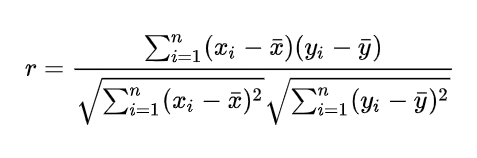

Les valeurs données par la formule varient de r = -1 à r = 1, où 1 forme une corrélation directe entre les deux entités (il s'agit d'une corrélation positive parfaite) et -1 forme une corrélation négative parfaite.

Dans notre cas, un 1 signifie que les deux utilisateurs ont des goûts similaires, tandis qu'un -1 signifie le contraire.

In [400]:
userSubsetGroup = userSubsetGroup[0:100]

In [401]:
from numpy import sqrt 

#Stocker la corrélation de Pearson dans un dictionnaire, où la clé est l'identifiant de l'utilisateur et 
#a valeur est le coefficient.
pearsonCorDict = {}

#Pour chaque groupe d'utilisateurs de notre sous-ensemble
for name, group in userSubsetGroup:
    #Commençons par trier les données d'entrée et le groupe d'utilisateurs actuel afin de ne pas mélanger les valeurs par la suite.
    group = group.sort_values(by='movieId')
    inputMovie = inputMovie.sort_values(by='movieId')
    #Obtenir la valeur N de la formule
    n = len(group)
    #Obtenez les notes des critiques des films qu'ils ont en commun
    temp = inputMovie[inputMovie['movieId'].isin(group['movieId'].tolist())]
    #Puis les stocker dans une variable tampon temporaire sous forme de liste afin de faciliter les calculs ultérieurs.
    tempRatingList = temp['rating'].tolist()
    #afficher les revues des groupes d'utilisateurs actuels sous forme de liste
    tempGroupList = group['rating'].tolist()
    #Calculons maintenant la corrélation de Pearson entre deux utilisateurs, appelés x et y.
    Sxx = sum([i**2 for i in tempRatingList]) - pow(sum(tempRatingList),2)/float(n)
    Syy = sum([i**2 for i in tempGroupList]) - pow(sum(tempGroupList),2)/float(n)
    Sxy = sum( i*j for i, j in zip(tempRatingList, tempGroupList)) - sum(tempRatingList)*sum(tempGroupList)/float(n)
    
    #Si le dénominateur est différent de zéro, on divise, sinon on corrige par 0..
    if Sxx != 0 and Syy != 0:
        pearsonCorDict[name] = Sxy/sqrt(Sxx*Syy)
    else:
        pearsonCorDict[name] = 0

In [402]:
pearsonCorDict.items()

dict_items([(91, -0.6890618270883883), (294, 0.10783277320343156), (586, 0.7836445860269199), (648, 0.444102681159703), (54, 0.38138503569823695), (116, 0.46360044557175345), (137, 0.6708203932499369), (140, 0.3086066999241838), (156, -0.3651483716701107), (220, -0.24253562503633297), (232, 0.9203579866168444), (271, 0.8944271909999159), (298, 0.3651483716701107), (347, 0.6454972243679028), (359, -0.5345224838248488), (367, 0.7893862224383407), (370, 0.7627700713964739), (388, 0.34608266424225137), (413, -0.07142857142857142), (425, 0.19069251784911848), (427, 0.36514837167011077), (440, 0.5007733956671915), (462, 0.9897782665572894), (473, 0.19069251784911848), (546, 0.9970544855015815), (614, -0.5567112005113768), (649, 0.6761234037828132), (11, 0.0), (13, 0.7205766921228924), (34, -0.6933752452815362), (58, -0.2773500981126152), (90, 0), (104, 0), (124, 0.2773500981126147), (129, -0.32732683535398843), (131, 0.27735009811261385), (132, 0.9449111825230734), (134, 0.24019223070763082)

In [403]:
pearsonDF = pd.DataFrame.from_dict(pearsonCorDict, orient='index')
pearsonDF.columns = ['similarityIndex']
pearsonDF['userId'] = pearsonDF.index
pearsonDF.index = range(len(pearsonDF))
pearsonDF.head()

,similarityIndex,userId
0,-0.689062,91
1,0.107833,294
2,0.783645,586
3,0.444103,648
4,0.381385,54


In [404]:
topUsers=pearsonDF.sort_values(by='similarityIndex', ascending=False)[0:50]
topUsers.head()

,similarityIndex,userId
97,1.0,47
92,1.0,22
90,1.0,8
89,1.0,1
94,1.0,24


Note des utilisateurs sélectionnés par rapport à tous les films, nous allons procéder en prenant la moyenne pondérée des notations des films en utilisant la corrélation de Pearson comme poids. Mais pour ce faire, nous devons d'abord obtenir les films regardés par les utilisateurs dans notre pearsonDF à partir du dataframe des évaluations, puis stocker leur corrélation dans une nouvelle colonne appelée _similarityIndex". Nous y parvenons ci-dessous en fusionnant ces deux tables.

In [53]:
topUsersRating=topUsers.merge(df_ratings, left_on='userId', right_on='userId', how='inner')
topUsersRating.head()

,similarityIndex,userId,movieId,rating
0,1.0,47,1,1.0
1,1.0,47,34,0.5
2,1.0,47,47,3.0
3,1.0,47,88,4.5
4,1.0,47,110,3.0


multiplication de la note du film par son poids (l'indice de similarité), puis additionner les nouvelles notes et les diviser par la somme des poids.

Nous pouvons facilement faire cela en multipliant simplement deux colonnes, puis en regroupant le dataframe par movieId et en divisant ensuite deux colonnes :

In [54]:
#Multiplie la similarité par les notes attribuées par l'utilisateur
topUsersRating['weightedRating'] = topUsersRating['similarityIndex']*topUsersRating['rating']
topUsersRating.head()

,similarityIndex,userId,movieId,rating,weightedRating
0,1.0,47,1,1.0,1.0
1,1.0,47,34,0.5,0.5
2,1.0,47,47,3.0,3.0
3,1.0,47,88,4.5,4.5
4,1.0,47,110,3.0,3.0


In [55]:
#Applique une somme aux topUsers après les avoir regroupés par userId
tempTopUsersRating = topUsersRating.groupby('movieId').sum()[['similarityIndex','weightedRating']]
tempTopUsersRating.columns = ['sum_similarityIndex','sum_weightedRating']
tempTopUsersRating.head()

,sum_similarityIndex,sum_weightedRating
movieId,,
1,30.334409,102.743487
2,25.876325,76.883348
3,7.767485,25.544250
4,1.441153,4.323460
5,6.930207,17.647660


In [56]:
#Crée un cadre de données vide
recommendation_df = pd.DataFrame()
#Nous prenons maintenant la moyenne pondérée
recommendation_df['weighted average recommendation score'] = tempTopUsersRating['sum_weightedRating']/tempTopUsersRating['sum_similarityIndex']
recommendation_df['movieId'] = tempTopUsersRating.index
recommendation_df.head()

,weighted average recommendation score,movieId
movieId,,
1,3.387028,1
2,2.971185,2
3,3.288613,3
4,3.000000,4
5,2.546484,5


In [57]:
recommendation_df = recommendation_df.sort_values(by='weighted average recommendation score', ascending=False)
recommendation_df.head(10)

,weighted average recommendation score,movieId
movieId,,
3038,5.0,3038
102993,5.0,102993
26422,5.0,26422
2266,5.0,2266
178,5.0,178
8492,5.0,8492
8370,5.0,8370
55721,5.0,55721
34323,5.0,34323


In [58]:
df_movies.loc[df_movies['movieId'].isin(recommendation_df.head(10)['movieId'].tolist())]

,movieId,title,year
176,178,Love & Human Remains,1993
2181,2266,"Butcher's Wife, The",1991
2951,3038,"Face in the Crowd, A",1957
7747,8327,Dolls,2002
7771,8370,"Blind Swordsman: Zatoichi, The (Zatôichi)",2003
7847,8492,"Christmas Carol, A (Scrooge)",1951
8836,26422,Hair,1979
10269,34323,"Devil's Rejects, The",2005
12204,55721,Elite Squad (Tropa de Elite),2007
21120,102993,"Way, Way Back, The",2013


## 2 -  Collaborative Filtering
Nous utiliserons ici des méthodes de réduction de la dimensionnalité pour améliorer la robustesse et la précision de la FC basée sur la mémoire. Fondamentalement, nous compressons la matrice des éléments de l'utilisateur en une matrice de faible dimension. Nous utilisons des techniques telles que le SVD, qui est une méthode de factorisation à faible rang, l'ACP, qui est utilisée pour la réduction de la dimensionnalité, etc.

Les méthodes fondées sur un modèle sont basées sur la factorisation des matrices et sont plus efficaces pour gérer la rareté.

Nous utiliserons une bibliothèque "Surprise" pour implémenter SVD, KNN et NMF.

bibliothèque Surprise contient presque tous les algorithmes requis pour les systèmes de recommandation basés sur des modèles.

Pour charger un jeu de données à partir d'un cadre de données pandas, vous aurez besoin de la méthode load_from_df(). Vous aurez également besoin d'un objet Reader, mais seul le paramètre rating_scale doit être spécifié.

La classe Reader est utilisée pour analyser un fichier contenant des classements.

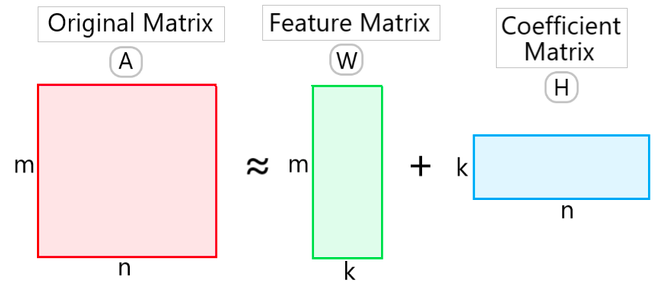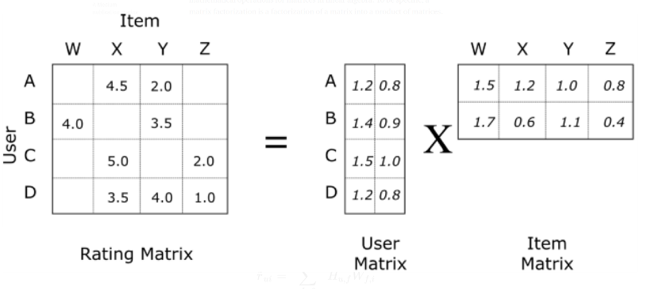

In [433]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from surprise import Dataset, Reader, KNNBasic, SVD, NMF
import tensorflow as tf
from keras.layers import Input, Embedding, Flatten, Dense, concatenate
from keras.models import Model

In [406]:
df_ratings = pd.read_csv('movies/rating.csv')
df_movies = pd.read_csv('movies/movie.csv')

In [407]:
df = df_ratings[['userId', 'movieId', 'rating']]

In [408]:
df.shape

(20000263, 3)

## 2.1 - Filtrage collaboratif avec factorisation matricielle

Le filtrage collaboratif a un problème avec le démarrage à froid de l'utilisateur, quel modèle pourrait ne pas être en mesure de fournir une liste de recommandations décente à ceux qui ont donné un faible nombre d'évaluations, donc le modèle manque d'informations sur les préférences de l'utilisateur de démarrage à froid calculer une table masive).

In [409]:
n_interacted = 2000
user_movie_data_temp = pd.pivot_table(df, index = ['userId'], values='movieId', aggfunc='count')
user_movie_data_temp[user_movie_data_temp.movieId>=n_interacted]
selected_user_ids = user_movie_data_temp[user_movie_data_temp.movieId>=n_interacted].index
print('nombre utilisateur: ', str(len(selected_user_ids)))

n_rated = 1000
get_rated_movie = pd.pivot_table(df, index=['movieId'], values='userId', aggfunc='count')
get_rated_movie[get_rated_movie.userId>=n_rated]
selected_movie_ids = get_rated_movie[get_rated_movie.userId>=n_rated].index

print('nombre id film: ', str(len(selected_movie_ids)))

filtered_rating_data = df[(df['userId'].isin(selected_user_ids)) &(df['movieId'].isin(selected_movie_ids))]
filtered_rating_data['movieId'] = filtered_rating_data['movieId'].apply(lambda x: 'm_'+str(x))

print('taille des données .  : ',str(filtered_rating_data.shape))

nombre utilisateur:  255
nombre id film:  3159
taille des données .  :  (409728, 3)


C:\Users\worou\AppData\Local\Temp\ipykernel_20136\3487859229.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [410]:
filtered_rating_data = filtered_rating_data[['userId','movieId','rating']]
filtered_rating_data

,userId,movieId,rating
19846,156,m_1,5.0
19847,156,m_2,5.0
19848,156,m_3,2.0
19849,156,m_4,3.0
19850,156,m_5,3.0
...,...,...,...
19963279,138208,m_89492,3.5
19963282,138208,m_89864,4.5
19963285,138208,m_90746,3.0
19963286,138208,m_91077,3.5


- Comme d'habitude, nous diviserons les données en deux groupes : un ensemble d'apprentissage et un ensemble de test — en utilisant la méthode train_test_split.

In [414]:
from sklearn.model_selection import train_test_split, cross_validate

In [415]:
train_df, test_df =  train_test_split(filtered_rating_data, 
                                   stratify = filtered_rating_data['userId'],
                                   test_size = 0.2,
                                   random_state = 42)

print('train_df size:{}'.format(len(train_df)))
print('test_df size:{}'.format(len(test_df)))

train_df size:327782
test_df size:81946


- Bien que les informations dont nous avons besoin soient présentes, elles ne sont pas présentées de manière à ce que les humains puissent les comprendre. Cependant, nous avons créé un tableau qui présente les mêmes données dans un format plus facile à comprendre pour les humains.

In [416]:
user_movie_data_train = train_df.pivot(index='userId', columns='movieId', values='rating').fillna(0.0)
user_movie_data_train

movieId,m_1,m_10,m_100,m_1003,m_1004,m_1005,m_1006,m_1007,m_1009,m_101,...,m_97938,m_98154,m_986,m_98809,m_98961,m_991,m_99114,m_994,m_996,m_999
userId,,,,,,,,,,,,,,,,,,,,,
156,5.0,0.0,0.0,4.0,0.0,3.0,3.0,2.0,3.0,0.0,...,0.0,0.0,5.0,0.0,0.0,4.0,0.0,3.0,3.0,5.0
741,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
903,4.0,1.0,0.0,2.0,0.0,0.0,2.0,3.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0
982,3.0,3.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,3.5
2261,0.0,3.0,0.0,0.0,0.0,0.0,3.0,2.5,2.5,0.0,...,0.0,0.0,0.0,0.0,0.0,2.5,0.0,3.0,0.0,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137202,4.5,4.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,4.5,4.5,0.0,4.0,2.0,0.0
137277,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.5,0.0,0.0,4.0,0.0,3.0,0.0
137343,4.0,0.0,0.0,0.0,1.0,2.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,3.5,0.0,0.0,0.0


# 1 : Factorisation matricielle en Python à partir de zéro
Implémentation de la factorisation matricielle avec la descente de gradient. 

La matrix_factorizationfonction renvoie 2 matrices : nP (matrice utilisateur) et nQ (matrice film)

In [417]:
def matrix_factorization(R, K, steps=5, alpha=0.002, beta=0.02):
    '''
    R: rating matrix
    P: |U| * K (User features matrix)
    Q: |D| * K (Item features matrix)
    K: latent features
    steps: iterations
    alpha: learning rate
    beta: regularization parameter
    
    '''
 
    P = np.random.rand(len(R),K)
    Q = np.random.rand(len(R[0]),K)
    Q = Q.T

    for step in range(steps):
        print('Processing epoch {}'.format(step))
        
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    eij = R[i][j] - np.dot(P[i,:],Q[:,j])
                    for k in range(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])

        eR = np.dot(P,Q)

        e = 0

        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    e = e + pow(R[i][j] - np.dot(P[i,:],Q[:,j]), 2)
                    for k in range(K):
                        e = e + (beta/2) * (pow(P[i][k],2) + pow(Q[k][j],2))
        # 0.001: local minimum
        if e < 0.001:

            break

    return P, Q.T

- Ensuite, ajustons l'ensemble de données d'apprentissage au modèle et ici, nous fixons n_factor K = 5.

- Ensuite, les prédictions peuvent être calculées en multipliant nP et la transposition de nQ à l'aide de la méthode du produit scalaire, comme illustré dans l'extrait de code ci-dessous.

In [419]:
R = np.array(user_movie_data_train)
nP, nQ = matrix_factorization(R, K=5)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4


In [429]:
model = matrix_factorization(R, K=5)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4


In [420]:
pred_R = np.dot(nP, nQ.T)

# Transformer la prédiction en matrice reconstruite en une trame de données Pandas au format croisé
user_movie_pred = pd.DataFrame(pred_R, columns=user_movie_data_train.columns, index=list(user_movie_data_train.index))
print(user_movie_pred.shape)
user_movie_pred.head(10)

(255, 3159)


movieId,m_1,m_10,m_100,m_1003,m_1004,m_1005,m_1006,m_1007,m_1009,m_101,...,m_97938,m_98154,m_986,m_98809,m_98961,m_991,m_99114,m_994,m_996,m_999
156,4.661844,3.797540,3.448017,3.248326,2.491000,2.299653,3.376962,3.137607,3.628403,3.891261,...,4.246463,4.476278,3.901116,4.294139,4.456128,4.027740,4.544002,4.415727,3.213640,3.707912
741,4.576824,3.706954,3.433472,3.163367,2.461984,2.283282,3.265016,3.064210,3.575888,3.785832,...,4.101991,4.424495,3.758104,4.161184,4.303034,3.999961,4.408429,4.346651,3.209979,3.583886
903,3.465012,2.847936,2.591443,2.469745,1.787786,1.731530,2.377105,2.389077,2.647294,2.995389,...,3.084028,3.184660,2.937892,3.115680,3.262962,2.897699,3.444538,3.149781,2.361812,2.802825
982,3.805375,3.118411,2.876253,2.822195,2.065230,1.820776,2.752752,2.637486,2.944352,3.335360,...,3.480659,3.602862,3.249107,3.545086,3.732924,3.202163,3.837845,3.679825,2.642504,3.071413
2261,3.234799,2.626068,2.406832,2.238523,1.726089,1.610708,2.309533,2.164672,2.520060,2.688765,...,2.907491,3.092747,2.672369,2.948657,3.042231,2.797168,3.124849,3.034460,2.242673,2.547960
3318,4.252887,3.495794,3.185115,3.208170,2.324734,1.991346,3.150403,2.955960,3.291566,3.772745,...,3.958025,4.013287,3.682820,4.037243,4.253108,3.533031,4.338034,4.145486,2.921091,3.466404
3907,3.476456,2.836550,2.620102,2.512182,1.881356,1.689511,2.504134,2.379169,2.700168,2.981593,...,3.157980,3.321035,2.926586,3.210913,3.359955,2.970134,3.447532,3.343293,2.423806,2.775031
4222,4.768514,3.882035,3.569029,3.430928,2.559253,2.325988,3.402169,3.223511,3.700553,4.098699,...,4.287692,4.451546,3.977839,4.385552,4.522262,4.000545,4.688695,4.452855,3.287094,3.783232
4358,4.622231,3.774631,3.439470,3.322627,2.476262,2.246966,3.332600,3.139687,3.583176,3.966761,...,4.202282,4.347138,3.896783,4.277578,4.439100,3.895627,4.570540,4.352632,3.172691,3.698248
6636,4.355489,3.562525,3.267819,3.223097,2.353866,2.083191,3.143949,2.986475,3.370727,3.824344,...,3.964098,4.052244,3.695958,4.058134,4.221321,3.609278,4.365042,4.124085,2.993627,3.499663


In [421]:
# User Matrix

Pu = pd.DataFrame(nP, index=list(user_movie_data_train.index))

# Movie Matrix

Qu = pd.DataFrame(nQ, index=user_movie_data_train.columns)

In [422]:
def predict_rating(data):
    try:
        pred_rating = np.dot(Pu.loc[data.userId], Qu.loc[data.movieId].T)
    except Exception as e:
        pred_rating = np.nan
        print('Unknown user: {} or movieId: {}'.format(data.userId,data.movieId))
    return pred_rating

In [423]:
test_df['pred_rating'] = test_df.apply(predict_rating, axis=1)

In [424]:
test_df.head(10)

,userId,movieId,rating,pred_rating
654970,4358,m_2321,5.0,4.073860
13352187,92269,m_47099,2.5,3.239343
654574,4358,m_1256,5.0,4.484309
12950342,89402,m_4844,3.0,2.954166
10466542,72401,m_3480,1.5,2.838440
333215,2261,m_3308,3.0,2.500449
14890687,102888,m_332,3.0,2.754818
16818222,116317,m_7143,3.0,3.171762
19442286,134567,m_2403,4.0,3.335499
17628838,121930,m_63131,2.5,2.802255


- Évaluation des performances de prédiction.

Bien qu'il existe diverses mesures d'évaluation pour les systèmes de recommandation, telles que Precision, Recall, MAP, et la liste continue. nous utiliserons une métrique de précision de base, à savoir RMSE.

In [425]:
rmse_test = mean_squared_error(test_df['rating'], test_df['pred_rating'], squared=False)
rmse_test

0.8182393199732281

In [435]:
mae_test = mean_absolute_error(test_df['rating'], test_df['pred_rating'])
mae_test

0.6341649389669431

# 2 - Factorisation matricielle avec package surprise

In [436]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from surprise import Dataset, Reader, SVD, NMF, accuracy
from surprise.model_selection import train_test_split as surprise_train_test_split
from surprise.model_selection import cross_validate, GridSearchCV, train_test_split

In [437]:
filtered_rating_data

,userId,movieId,rating
19846,156,m_1,5.0
19847,156,m_2,5.0
19848,156,m_3,2.0
19849,156,m_4,3.0
19850,156,m_5,3.0
...,...,...,...
19963279,138208,m_89492,3.5
19963282,138208,m_89864,4.5
19963285,138208,m_90746,3.0
19963286,138208,m_91077,3.5


In [444]:
import surprise as sp

In [447]:
reader = Reader(rating_scale=(0.5,5))
data = Dataset.load_from_df(filtered_rating_data[['userId','movieId','rating']], reader)

benchmark = []
# Itération sur tous les algorithmes
for algorithm in [sp.SVD(n_epochs = 10, lr_all = 0.005), sp.SVDpp(), sp.SlopeOne(), sp.NMF(), sp.NormalPredictor(), sp.KNNBaseline(), sp.KNNBasic(n_neighbours=10, mink=6, min_support=2,sim_options=sim_options, verbose=False, random_state=1), sp.KNNWithMeans(), sp.KNNWithZScore(), sp.BaselineOnly(), sp.CoClustering()]:
    # Performance cross validation
    results = cross_validate(algorithm, data, measures=['RMSE', 'MAE'], cv=3, verbose=False)
    
    # Obtenir les résultats et ajouter le nom de l'algorithme
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    
    # Stockage des données
    benchmark.append(tmp)

C:\Users\worou\AppData\Local\Temp\ipykernel_20136\2846132995.py:12: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\worou\AppData\Local\Temp\ipykernel_20136\2846132995.py:12: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\worou\AppData\Local\Temp\ipykernel_20136\2846132995.py:12: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\worou\AppData\Local\Temp\ipykernel_20136\2846132995.py:12: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\worou\AppData\Local\Temp\ipykernel_20136\2846132995.py:12: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pand

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.


C:\Users\worou\AppData\Local\Temp\ipykernel_20136\2846132995.py:12: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\worou\AppData\Local\Temp\ipykernel_20136\2846132995.py:12: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


C:\Users\worou\AppData\Local\Temp\ipykernel_20136\2846132995.py:12: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


C:\Users\worou\AppData\Local\Temp\ipykernel_20136\2846132995.py:12: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


C:\Users\worou\AppData\Local\Temp\ipykernel_20136\2846132995.py:12: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\worou\AppData\Local\Temp\ipykernel_20136\2846132995.py:12: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [448]:
# Pour créer des graphiques interactifs
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [449]:
# Stockage resultats
surprise_results = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse', ascending=False)

# obtenir les données
data = surprise_results[['test_rmse', 'test_mae']]
grid = data.values

# Création d'axe d'étiquettes 
x_axis = [label.split('_')[1].upper() for label in data.columns.tolist()]
y_axis = data.index.tolist()

x_label = 'Mesure des performances'
y_label = 'Algorithm'


# Obtenir des annotations et du texte en surimpression
hovertexts = []
annotations = []
for i, y_value in enumerate(y_axis):
    row = []
    for j, x_value in enumerate(x_axis):
        annotation = grid[i, j]
        row.append('Error: {:.3f}<br>{}: {}<br>{}: {}<br>Fit Time: {:.3f}s<br>Test Time: {:.3f}s'.format(annotation, y_label, y_value ,x_label, x_value, surprise_results.loc[y_value]['fit_time'], surprise_results.loc[y_value]['test_time']))
        annotations.append(dict(x=x_value, y=y_value, text='{:.3f}'.format(annotation), ax=0, ay=0, font=dict(color='#000000')))
    hovertexts.append(row)

# Graphique
trace = go.Heatmap(x = x_axis,
                   y = y_axis,
                   z = data.values,
                   text = hovertexts,
                   hoverinfo = 'text',
                   colorscale = 'Picnic',
                   colorbar = dict(title = 'Error'))

# Create layout
layout = go.Layout(title = 'Comparaison croisée des algorithmes de surprise',
                   xaxis = dict(title = x_label),
                   yaxis = dict(title = y_label,
                                tickangle = -40),
                   annotations = annotations)

# plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [450]:
sdvpp = sp.SVDpp()

In [456]:
reader = Reader(rating_scale=(0.5,5))
data = Dataset.load_from_df(filtered_rating_data[['userId','movieId','rating']], reader)

trainset, testset = train_test_split(data, test_size=0.25)

# Nous utiliserons le célèbre algorithme SVD (celui de la factorisation matricielle)..
svdpp = sp.SVDpp()

# Entraînement de l'algorithme sur la rating et prédisons les notes de l'ensemble de test
svdpp.fit(trainset)
svdpp_pred = sdv.test(testset)

# Then compute RMSE
evaluation_svdpp = cross_validate(svdpp, data, measures=['RMSE','MAE'], cv= 5, verbose=True)

Evaluating RMSE, MAE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.7600  0.7534  0.7522  0.7538  0.7587  0.7556  0.0031  
MAE (testset)     0.5813  0.5760  0.5746  0.5761  0.5802  0.5776  0.0026  
Fit time          709.95  704.26  377.71  390.09  376.83  511.77  159.57  
Test time         112.75  58.22   58.73   417.03  61.77   141.70  139.20  


- Fonction de prédiction des top 

In [457]:
from collections import defaultdict

In [458]:
def get_top_n(predictions, n=5):
    # Il s'agit d'abord d'associer les prédictions à chaque utilisateur.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Trier ensuite les prédictions pour chaque utilisateur et extraire les k prédictions les plus élevées.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

**- Top 10 des prédictions des notes par utilisateurs**

In [459]:
top_n = get_top_n(svd_pred, 10)

top_nn = pd.DataFrame(top_n)
top_nn.head(10)

,51703,75810,71975,25101,117395,45987,130767,113991,33736,10761,...,129583,80771,58069,12131,113806,63147,92269,2261,98420,17040
0,"(m_2571, 4.90013018581787)","(m_922, 5)","(m_318, 4.744482013894167)","(m_3741, 5)","(m_2019, 5)","(m_912, 4.664701319439006)","(m_858, 4.624374172696041)","(m_1196, 5)","(m_296, 3.962839005724819)","(m_750, 4.793481119006499)",...,"(m_2571, 4.739703932118762)","(m_2959, 4.603987710247113)","(m_1198, 4.371261586039059)","(m_593, 3.984114196712142)","(m_3578, 4.965893528665717)","(m_858, 4.2031370301327335)","(m_858, 4.904052232534253)","(m_1198, 3.829409730045943)","(m_858, 4.490274493957014)","(m_7361, 4.361012166615386)"
1,"(m_318, 4.893295135621761)","(m_104841, 4.792531522226502)","(m_50, 4.634475286793049)","(m_1212, 5)","(m_750, 5)","(m_2791, 4.6456652543380095)","(m_922, 4.4714263120596645)","(m_1266, 4.73358296092336)","(m_2571, 3.9080019590805444)","(m_608, 4.4074809123501915)",...,"(m_4993, 4.593224811588186)","(m_1232, 4.597036816576596)","(m_527, 4.30623285214059)","(m_4993, 3.934760619987433)","(m_4226, 4.937274659577441)","(m_1213, 4.047722931017339)","(m_296, 4.676013682776123)","(m_1, 3.6603497699874903)","(m_5952, 4.443264209386329)","(m_3089, 4.144618531547061)"
2,"(m_50, 4.696736898496264)","(m_919, 4.773137321609202)","(m_1196, 4.416340039637455)","(m_1673, 5)","(m_2068, 5)","(m_5060, 4.552792169772447)","(m_199, 4.390867097980897)","(m_58559, 4.692521130621618)","(m_1219, 3.907262200173895)","(m_3996, 4.20669544015429)",...,"(m_4973, 4.513549052351892)","(m_924, 4.563586656794828)","(m_4993, 4.207588527220993)","(m_2571, 3.8897738344968222)","(m_260, 4.896442600409536)","(m_3730, 4.0221124519790905)","(m_3435, 4.545211013361291)","(m_1949, 3.6391349660238035)","(m_2529, 4.42562565603882)","(m_4973, 4.140244420637041)"
3,"(m_1721, 4.683665202854657)","(m_1387, 4.749414729656241)","(m_1704, 4.412852074779557)","(m_2019, 5)","(m_1213, 5)","(m_1198, 4.525155618447903)","(m_1254, 4.379525251201915)","(m_1221, 4.686774021984214)","(m_1193, 3.8997331154490786)","(m_1131, 4.187078645540011)",...,"(m_1198, 4.493103520913887)","(m_2076, 4.504580781859254)","(m_858, 4.169432182752536)","(m_2959, 3.821639275378974)","(m_2571, 4.885462258688476)","(m_951, 3.9934955647107597)","(m_1265, 4.516320398699016)","(m_1262, 3.6343078248264136)","(m_1210, 4.39932077020769)","(m_306, 4.062891458355635)"
4,"(m_87232, 4.599262246665265)","(m_1673, 4.736264384419035)","(m_1258, 4.387089247002198)","(m_1189, 5)","(m_923, 5)","(m_1132, 4.514856986393153)","(m_899, 4.328080599624617)","(m_541, 4.667159569416163)","(m_1198, 3.868160796687637)","(m_1208, 4.176933886791563)",...,"(m_2028, 4.480165563742177)","(m_1237, 4.399733963571958)","(m_2028, 4.155951090760347)","(m_7361, 3.809076681206003)","(m_50, 4.8440368204213)","(m_926, 3.896066829534126)","(m_923, 4.5087234530236096)","(m_318, 3.6157345343545058)","(m_1250, 4.3605597503227616)","(m_903, 4.048285203491221)"
5,"(m_58559, 4.576252694900726)","(m_3095, 4.710936351892972)","(m_33794, 4.363128560294692)","(m_593, 5)","(m_1193, 5)","(m_919, 4.372219417318268)","(m_5291, 4.256584091397984)","(m_1089, 4.62805411059676)","(m_1089, 3.8573272126475384)","(m_1199, 4.138147889924779)",...,"(m_8970, 4.444429771217944)","(m_1219, 4.366585121713811)","(m_1197, 4.136657008059126)","(m_1203, 3.785665579160649)","(m_33794, 4.841741618023733)","(m_3801, 3.873875636413834)","(m_1927, 4.493404614986044)","(m_898, 3.6109844005392024)","(m_4993, 4.337431862383072)","(m_1189, 4.043209258761285)"
6,"(m_589, 4.561661871542048)","(m_1228, 4.6915605522157975)","(m_3897, 4.335434634277417)","(m_1387, 5)","(m_1178, 4.988609251221591)","(m_608, 4.369840086539615)","(m_903, 4.2408567896097855)","(m_2019, 4.605262601615095)","(m_48394, 3.8419960137997626)","(m_4993, 4.124421390171638)",...,"(m_318, 4.411572302510263)","(m_4848, 4.315837971667808)","(m_50, 4.098746691010872)","(m_1206, 3.7834707003458443)","(m_1213, 4.8132161428230305)","(m_919, 3.8628532302057437)","(m_4117, 4.4627

In [465]:
from surprise import AlgoBase

class HybridAlgorithm(AlgoBase):

    def __init__(self, models, weights, sim_options={}):
        AlgoBase.__init__(self)
        self.models = models
        self.weights = weights

    def fit(self, trainset):
        AlgoBase.fit(self, trainset)
        
        for model in self.models:
            model.fit(trainset)
                
        return self

    def estimate(self, user_id, item_id):
        
        scores_sum = 0
        weights_sum = 0
        
        for i in range(len(self.models)):
            scores_sum += self.models[i].estimate(user_id, item_id) * self.weights[i] # 3*1/4+4*3/4 laga ra
            weights_sum += self.weights[i] # always becomes one
            
        return scores_sum / weights_sum

In [461]:
# Construire un modèle hybride en combinant les trois modèles
hybrid_model = HybridAlgorithm([svd, svdpp], [0.6, 0.5])

# Entraîner le modèle hybride
hybrid_model.fit(trainset)
hybrid_predictions = hybrid_model.test(testset)

evaluation_hybrid = cross_validate(hybrid_model, data, measures=['RMSE','MAE'], cv= 5, verbose=True)

Evaluating RMSE, MAE of algorithm HybridAlgorithm on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.7444  0.7458  0.7443  0.7494  0.7445  0.7457  0.0019  
MAE (testset)     0.5704  0.5712  0.5688  0.5719  0.5690  0.5702  0.0012  
Fit time          384.73  709.52  1329.64 750.36  761.02  787.05  304.73  
Test time         60.07   103.11  8907.15 109.97  112.00  1858.46 3524.40 


In [490]:
testset

[(19590, 'm_4052', 2.5),
 (34651, 'm_1131', 4.0),
 (124831, 'm_1617', 4.5),
 (51199, 'm_4464', 2.0),
 (51703, 'm_48304', 4.5),
 (133372, 'm_742', 1.0),
 (65304, 'm_1586', 3.0),
 (106939, 'm_2947', 5.0),
 (91193, 'm_1590', 2.5),
 (12131, 'm_538', 4.0),
 (86529, 'm_1980', 1.0),
 (53640, 'm_6155', 5.0),
 (96370, 'm_5303', 2.0),
 (41283, 'm_926', 4.5),
 (26867, 'm_1377', 3.0),
 (97853, 'm_1234', 4.0),
 (59407, 'm_4056', 3.0),
 (82418, 'm_631', 2.0),
 (79159, 'm_2094', 3.0),
 (86839, 'm_1866', 4.0),
 (24661, 'm_4343', 4.5),
 (27469, 'm_4091', 2.5),
 (18611, 'm_2084', 3.0),
 (88820, 'm_6001', 4.0),
 (34651, 'm_5481', 2.5),
 (104043, 'm_37386', 2.0),
 (107326, 'm_1019', 5.0),
 (57735, 'm_4306', 4.0),
 (9544, 'm_539', 3.0),
 (43194, 'm_5872', 3.5),
 (79159, 'm_1207', 4.5),
 (75810, 'm_3174', 4.0),
 (42929, 'm_2268', 4.0),
 (55765, 'm_4467', 3.5),
 (41283, 'm_1304', 4.0),
 (42204, 'm_1214', 4.0),
 (137343, 'm_8810', 3.0),
 (118205, 'm_2050', 3.0),
 (32514, 'm_5309', 3.5),
 (71975, 'm_3946', 2.0

In [470]:
reader = Reader(rating_scale=(0.5,5))
data = Dataset.load_from_df(filtered_rating_data[['userId','movieId','rating']], reader)

benchmark = []
# Itération sur tous les algorithmes
for algorithm in [HybridAlgorithm([svd, svdpp], [0.6, 0.5]), sp.SVD(n_epochs = 10, lr_all = 0.005), sp.SVDpp()]:
    # Performance cross validation
    results = cross_validate(algorithm, data, measures=['RMSE', 'MAE'], cv=3, verbose=False)
    
    # Obtenir les résultats et ajouter le nom de l'algorithme
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    
    # Stockage des données
    benchmark.append(tmp)

C:\Users\worou\AppData\Local\Temp\ipykernel_20136\452831372.py:12: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\worou\AppData\Local\Temp\ipykernel_20136\452831372.py:12: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\worou\AppData\Local\Temp\ipykernel_20136\452831372.py:12: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [472]:
# Stockage resultats
surprise_results = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse', ascending=False)

# obtenir les données
data = surprise_results[['test_rmse', 'test_mae']]
grid = data.values

# Création d'axe d'étiquettes 
x_axis = [label.split('_')[1].upper() for label in data.columns.tolist()]
y_axis = data.index.tolist()

x_label = 'Mesure des performances'
y_label = 'Algorithm'


# Obtenir des annotations et du texte en surimpression
hovertexts = []
annotations = []
for i, y_value in enumerate(y_axis):
    row = []
    for j, x_value in enumerate(x_axis):
        annotation = grid[i, j]
        row.append('Error: {:.3f}<br>{}: {}<br>{}: {}<br>Fit Time: {:.3f}s<br>Test Time: {:.3f}s'.format(annotation, y_label, y_value ,x_label, x_value, surprise_results.loc[y_value]['fit_time'], surprise_results.loc[y_value]['test_time']))
        annotations.append(dict(x=x_value, y=y_value, text='{:.3f}'.format(annotation), ax=0, ay=0, font=dict(color='#000000')))
    hovertexts.append(row)

# Graphique

trace = go.Heatmap(x = x_axis,
                   y = y_axis,
                   z = data.values,
                   text = hovertexts,
                   hoverinfo = 'text',
                   colorscale = 'Picnic',
                   colorbar = dict(title = 'Error'))

# Create layout
layout = go.Layout(title = 'Comparaison croisée des algorithmes de surprise',
                   xaxis = dict(title = x_label),
                   yaxis = dict(title = y_label,
                                tickangle = -40),
                   annotations = annotations)

# plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

**- Top 10 des prédictions des notes par utilisateurs**

In [473]:
top_n = get_top_n(hybrid_predictions, 10)

top_nn = pd.DataFrame(top_n)
top_nn.head(10)

,19590,34651,124831,51199,51703,133372,65304,106939,91193,12131,...,37317,17040,66836,741,982,131651,112988,23061,51075,79366
0,"(m_1249, 4.4969667658192165)","(m_1221, 5)","(m_858, 5)","(m_1284, 4.87729836028731)","(m_1196, 4.385961513316905)","(m_47, 4.798011395503623)","(m_903, 5)","(m_1203, 5)","(m_593, 3.8786730800298104)","(m_541, 3.9565679707350196)",...,"(m_318, 4.8645541222893485)","(m_750, 4.293016949931627)","(m_1248, 4.4753438187168735)","(m_1175, 5)","(m_1221, 4.371594464233236)","(m_1089, 4.674199111301472)","(m_912, 4.465916295822999)","(m_1221, 4.561592088932119)","(m_858, 4.752465913279805)","(m_2762, 4.815692956639704)"
1,"(m_3508, 4.487782495775641)","(m_1207, 4.895921193243782)","(m_923, 4.9769702091443815)","(m_1283, 4.731272721113253)","(m_527, 4.380192874956813)","(m_778, 4.760617409318428)","(m_951, 4.990702477107591)","(m_1254, 5)","(m_1207, 3.871773191161791)","(m_48516, 3.8976731733855394)",...,"(m_1, 4.721362521985053)","(m_48394, 4.210586135437663)","(m_922, 4.436903507806979)","(m_8154, 5)","(m_1258, 4.304182781425496)","(m_904, 4.667877726378196)","(m_2762, 4.403097151218766)","(m_922, 4.486467318421518)","(m_2571, 4.595122147848082)","(m_4993, 4.488600330090239)"
2,"(m_1097, 4.477377173510823)","(m_2664, 4.893764706562892)","(m_608, 4.91184075043831)","(m_1267, 4.6871487873186135)","(m_1625, 4.311385352433375)","(m_3949, 4.623135313730103)","(m_608, 4.97769443373608)","(m_318, 5)","(m_1262, 3.8511653856120627)","(m_1208, 3.874249022314276)",...,"(m_922, 4.590296851331181)","(m_778, 4.130318605484081)","(m_2731, 4.385268788573773)","(m_1252, 5)","(m_1208, 4.261152103390443)","(m_3093, 4.659959042029142)","(m_1221, 4.3679651242850035)","(m_912, 4.474689188697936)","(m_593, 4.575215426613348)","(m_1, 4.46693969567404)"
3,"(m_858, 4.336770781407737)","(m_50, 4.868876664493908)","(m_1228, 4.725591496300214)","(m_912, 4.684945735271064)","(m_1721, 4.310469270232197)","(m_48516, 4.5999679739919825)","(m_3424, 4.962326463822767)","(m_1136, 5)","(m_1204, 3.8435504608131827)","(m_7153, 3.8466115870525357)",...,"(m_33794, 4.560825799960693)","(m_1719, 4.111318617959021)","(m_1212, 4.376123852458685)","(m_750, 5)","(m_1219, 4.239025802714699)","(m_608, 4.649382303528649)","(m_1198, 4.354826305799783)","(m_1252, 4.4647778366959905)","(m_1136, 4.480506325050333)","(m_1198, 4.45758665838722)"
4,"(m_2150, 4.25248690287291)","(m_1208, 4.834479367984269)","(m_7361, 4.716312418066135)","(m_919, 4.666931884454534)","(m_480, 4.301227535463722)","(m_2329, 4.542934749132067)","(m_1212, 4.939715539294508)","(m_1252, 5)","(m_3435, 3.8078001979748533)","(m_1704, 3.8234072496824867)",...,"(m_1302, 4.512696915891641)","(m_501, 4.054493404210839)","(m_3093, 4.348445673556361)","(m_1235, 5)","(m_111, 4.221473538400281)","(m_4848, 4.640144418172798)","(m_608, 4.352862996723575)","(m_904, 4.456591773895012)","(m_923, 4.4006748076495255)","(m_81845, 4.377545698140796)"
5,"(m_43396, 4.236351709604548)","(m_7153, 4.80097170207334)","(m_1278, 4.682203662648413)","(m_951, 4.653345552137869)","(m_72998, 4.214969993089543)","(m_1208, 4.51743929781226)","(m_745, 4.936648331085807)","(m_2019, 5)","(m_3134, 3.7940420033421787)","(m_912, 3.7550290932105166)",...,"(m_1208, 4.473724783161348)","(m_608, 4.047390547493663)","(m_296, 4.260335158302301)","(m_1246, 5)","(m_1199, 4.184186908364441)","(m_750, 4.606374105950996)","(m_4993, 4.288476081679563)","(m_926, 4.346053014191505)","(m_3114, 4.395754680978742)","(m_78499, 4.350299600378139)"
6,"(m_3429, 4.2141445052764865)","(m_2571, 4.789949115715091)","(m_1256, 4.6169444167430225)","(m_3095, 4.647157670156246)","(m_3147, 4.193258588346015)","(m_1358, 4.484914329475541)","(m_1280, 4.83470119720344)","(m_923, 5)","(m_910, 3.7932508298446446)","(m_1732, 3.7314009226682905)",...,"(m_3471, 4.4597972118060545)","(m_2908, 4.042163238691244)","(m_1254, 4.232777063055877)","(m_1960, 5)","(m_541, 4.1749626096849335)","(m_922, 4.552433074567021)","(m_5008, 4.272490617767867)","(m_750, 4.3239107055432

In [538]:
def generate_recommendation(model, user_id, ratings_df, movies_df, n_items):
    # Obtenez une liste de tous les identifiants de films à partir de l'ensemble de données
    movie_ids = df_ratings["movieId"].unique()
    # Obtenir une liste de tous les films qui ont été regardés par l'utilisateur.
    movie_ids_user = df_ratings.loc[df_ratings["userId"] == user_id, "movieId"]
    # Obtenir une liste de tous les films IDS qui n'ont pas été regardés par l'utilisateur
    movie_ids_to_pred = np.setdiff1d(movie_ids, movie_ids_user)
 
   # Appliquer une note de 4 à toutes les interactions (uniquement pour correspondre au format de l'ensemble de données Surprise)
    test_set = [[user_id, movie_id, 4] for movie_id in movie_ids_to_pred]
 
   # Prévoir les évaluations et générer des recommandations
    predictions = model.test(test_set)
    pred_ratings = np.array([pred.est for pred in predictions])
    print("Top {0} recommandations d'éléments pour l'utilisateur {1}:".format(n_items, user_id))
   # Classer les films les plus populaires en fonction des évaluations prédites
    index_max = (-pred_ratings).argsort()[:n_items]
    for i in index_max:
        movie_id = movie_ids_to_pred[i]
        print(df_movies[df_movies["movieId"]==movie_id]["title"].values[0], pred_ratings[i])
 
 


In [575]:
# définir l'identifiant de l'utilisateur à qui nous voulons donner une recommandation
userID = 23
# définir le nombre de films top-n que nous voulons recommander
n_items = 10
# générer des recommandations à l'aide du modèle que nous avons formé
generate_recommendation(hybrid_model,userID,df_ratings,df_movies,n_items)

Top 10 item recommendations for user 23:
Jumanji 3.2669392865510773
Dr. Terror's House of Horrors 3.2669392865510773
Roxanne 3.2669392865510773
Fahrenheit 9/11 3.2669392865510773
Exterminating Angel, The (Ángel exterminador, El) 3.2669392865510773
Sister My Sister 3.2669392865510773
Johnny Guitar 3.2669392865510773
Overboard 3.2669392865510773
All of Me 3.2669392865510773
Our Hospitality 3.2669392865510773


In [ ]:
import pandas as pd
import numpy as np
import streamlit as st
import joblib

# Chargement des données (contenant les noms des films, les identifiants de films et les genres)
data = pd.read_csv('df_merge.csv')
df_ratings = pd.read_csv('df_ratings.csv')
df_movies = pd.read_csv('df_movies.csv')

def generate_recommendation(model, user_id, ratings_df, movies_df, n_items):
    # Obtenez une liste de tous les identifiants de films à partir de l'ensemble de données
    movie_ids = df_ratings["movieId"].unique()
    # Obtenir une liste de tous les films qui ont été regardés par l'utilisateur.
    movie_ids_user = df_ratings.loc[df_ratings["userId"] == user_id, "movieId"]
    # Obtenir une liste de tous les films IDS qui n'ont pas été regardés par l'utilisateur
    movie_ids_to_pred = np.setdiff1d(movie_ids, movie_ids_user)
 
   # Appliquer une note de 4 à toutes les interactions (uniquement pour correspondre au format de l'ensemble de données Surprise)
    test_set = [[user_id, movie_id, 4] for movie_id in movie_ids_to_pred]
 
   # Prévoir les évaluations et générer des recommandations
    predictions = model.test(test_set)
    pred_ratings = np.array([pred.est for pred in predictions])
    print("Top {0} recommandations d'éléments pour l'utilisateur {1}:".format(n_items, user_id))
   # Classer les films les plus populaires en fonction des évaluations prédites
    index_max = (-pred_ratings).argsort()[:n_items]
    for i in index_max:
        movie_id = movie_ids_to_pred[i]
        print(df_movies[df_movies["movieId"]==movie_id]["title"].values[0], pred_ratings[i])

# Charger le modèle hybride
hybrid_model = joblib.load("svdpp_model.pkl")

# Interface utilisateur Streamlit
st.title("Système de recommandation de films")

# Formulaire de saisie utilisateur
user_id = st.text_input("Entrez l'ID de l'utilisateur:")
n_items = st.text_input("Entrez l'ID du film:")

if user_id and movie_id:
    try:
        user_id = int(user_id)
        n_items = int(n_items)

        # Faire une recommandation en utilisant le modèle hybride
        prediction = generate_recommendation(hybrid_model,user_id,df_ratings,df_movies,n_items)

        st.write(f"La prédiction de la note pour l'utilisateur {user_id} et le film {n_items} est {prediction:.2f}")
    except ValueError:
        st.write("Veuillez entrer des valeurs numériques valides.")

- Enregistrons chaque modèle individuel utilisé dans notre modèle hybride :

In [495]:
import joblib

# Enregistrez les modèles individuels
svd_model_filename = "svd_model.pkl"
joblib.dump(svd, svd_model_filename)

svdpp_model_filename = "svdpp_model.pkl"
joblib.dump(svdpp, svdpp_model_filename)


['svdpp_model.pkl']

- Enregistrons les poids ou les informations nécessaires pour combiner ces modèles dans votre modèle hybride :

In [496]:
# Enregistrez les informations nécessaires pour combiner les modèles
hybrid_info = {
    'weights': hybrid_model.weights,
    'models_filenames': [svd_model_filename, svdpp_model_filename]
}
joblib.dump(hybrid_info, "hybrid_info.pkl")

['hybrid_info.pkl']

Pour charger le modèle en production, nous allons charger d'abord les modèles individuels, puis les combinez avec les informations enregistrées pour obtenir le modèle hybride complet :

In [497]:
# Chargez les modèles individuels
loaded_svd = joblib.load(svd_model_filename)
loaded_svdpp = joblib.load(svdpp_model_filename)


# Chargez les informations pour combiner les modèles
loaded_hybrid_info = joblib.load("hybrid_info.pkl")

# Créez le modèle hybride en utilisant les modèles individuels et les informations
loaded_hybrid_model = HybridAlgorithm(
    models=[loaded_svd, loaded_svdpp],
    weights=loaded_hybrid_info['weights']
)

In [512]:
# Remplacez par l'ID de l'utilisateur pour lequel vous voulez faire une recommandation
new_user_id = 138493 
# Remplacez par l'ID du film que vous voulez recommander à l'utilisateur
new_movie_id = 689

In [513]:
prediction = loaded_hybrid_model.estimate(new_user_id, new_movie_id)

In [516]:
prediction

3.2684199943310226

In [506]:
df_ratings

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40
...,...,...,...,...
20000258,138493,68954,4.5,2009-11-13 15:42:00
20000259,138493,69526,4.5,2009-12-03 18:31:48
20000260,138493,69644,3.0,2009-12-07 18:10:57
20000261,138493,70286,5.0,2009-11-13 15:42:24


In [528]:
hybrid_model.predict(138, 4555, verbose=True)

user: 138        item: 4555       r_ui = None   est = 3.27   {'was_impossible': False}


Prediction(uid=138, iid=4555, r_ui=None, est=3.2669392865510773, details={'was_impossible': False})

In [520]:
svd.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 3.27   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=3.266939286551078, details={'was_impossible': False})

In [521]:
svdpp.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 3.27   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=3.266939286551078, details={'was_impossible': False})

In [529]:
def get_Iu(uid):
    """Renvoie le nombre d'éléments évalués par un utilisateur donné
    
    Args :
        uid : L'identifiant brut de l'utilisateur.
    Retourne :
        Le nombre de film évalués par l'utilisateur.
    """
    
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError:  # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """Renvoie le nombre d'utilisateurs qui ont évalué un élément donné
    
    Args :
        iid : L'identifiant brut du film.
    Returns :
        Le nombre d'utilisateurs qui ont évalué le film.
    """
    
    try:
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:  # item was not part of the trainset
        return 0

df = pd.DataFrame(hybrid_predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])    
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)

In [530]:
df.head()

,uid,iid,rui,est,details,Iu,Ui,err
0,19590,m_4052,2.5,3.133165,{'was_impossible': False},952,73,0.633165
1,34651,m_1131,4.0,4.707769,{'was_impossible': False},1384,64,0.707769
2,124831,m_1617,4.5,4.405652,{'was_impossible': False},1166,193,0.094348
3,51199,m_4464,2.0,3.614938,{'was_impossible': False},1088,89,1.614938
4,51703,m_48304,4.5,3.430799,{'was_impossible': False},1572,90,1.069201


In [531]:
best_predictions = df.sort_values(by='err')[:10]
worst_predictions = df.sort_values(by='err')[-10:]

In [532]:
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
47481,62040,m_1732,5.0,5.0,{'was_impossible': False},1126,185,0.0
8568,103223,m_1204,5.0,5.0,{'was_impossible': False},1505,155,0.0
97224,72008,m_904,5.0,5.0,{'was_impossible': False},1102,159,0.0
35820,25101,m_1212,5.0,5.0,{'was_impossible': False},1224,125,0.0
6791,4358,m_2174,5.0,5.0,{'was_impossible': False},1350,175,0.0
71048,131894,m_258,5.0,5.0,{'was_impossible': False},817,44,0.0
49693,119048,m_1208,5.0,5.0,{'was_impossible': False},1267,186,0.0
2649,741,m_1175,5.0,5.0,{'was_impossible': False},783,97,0.0
8580,741,m_8154,5.0,5.0,{'was_impossible': False},783,62,0.0
79671,133811,m_1196,5.0,5.0,{'was_impossible': False},1307,197,0.0


In [533]:
worst_predictions

,uid,iid,rui,est,details,Iu,Ui,err
44610,72008,m_108932,0.5,4.385889,{'was_impossible': False},1102,49,3.885889
2993,72008,m_1295,0.5,4.399164,{'was_impossible': False},1102,84,3.899164
3820,131894,m_44555,0.5,4.416134,{'was_impossible': False},817,102,3.916134
69330,130191,m_1954,0.5,4.451135,{'was_impossible': False},1009,178,3.951135
48519,46470,m_1721,0.5,4.454645,{'was_impossible': False},1695,172,3.954645
99737,72008,m_5952,0.5,4.569921,{'was_impossible': False},1102,174,4.069921
53771,72008,m_3134,0.5,4.686581,{'was_impossible': False},1102,68,4.186581
99246,72008,m_1279,0.5,4.706916,{'was_impossible': False},1102,67,4.206916
46186,21861,m_1186,0.5,4.840590,{'was_impossible': False},1060,137,4.340590
90830,131894,m_1537,0.5,4.951470,{'was_impossible': False},817,59,4.451470


In [535]:
!pip install Flask

In [536]:
from flask import Flask, request, jsonify
import joblib

app = Flask(__name__)

# Chargez le modèle hybride
loaded_hybrid_model = joblib.load("hybrid_model.pkl")

@app.route('/recommend', methods=['POST'])
def recommend():
    data = request.get_json()
    user_id = data['user_id']
    movie_id = data['movie_id']

    # Utilisez le modèle pour faire une recommandation
    prediction = loaded_hybrid_model.estimate(user_id, movie_id)

    # Renvoyez la recommandation au format JSON
    return jsonify({'prediction': prediction})

if __name__ == '__main__':
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [11/Sep/2023 20:46:29] "GET / HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [11/Sep/2023 20:46:29] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [11/Sep/2023 20:49:07] "GET / HTTP/1.1" 404 -
